**Problem Statement :**


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.


There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

In [1]:
#libraries
import pandas as pd ,numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#setting this will help to reproduce same results everytime 
np.random.seed(1)

#filterwarnings and autosave
import warnings 
warnings.filterwarnings("ignore")

%autosave 1

Autosaving every 1 seconds


In [2]:
#setting maximum display rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### Importing data

In [3]:
#reading the csv 
df = pd.read_csv("telecom_churn_data.csv")
df

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0            6/30/2014            7/31/2014   
2                 0.0            6/30/2014            7/31/2014   
3                 0.0            6/30/2014            7/31/2014   
4                 0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0                8/31/2014            9/30/2014  197.385  214.816  213.803   
1                8/31/2014            9/30/2014   34.047  355.074  268.321   
2                8/31/2014            9/30/2014  167.690  189.058  210.226   
3                8/31/2014            9/30/2014  221.338  251.102  508.054   
4                8/31/2014            9/30/2014  261.636  309.876  238.174   
...                    ...                  ...      ...      ...      ...   
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100          NaN          NaN         0.00          NaN   
1       86.285        24.11        78.68         7.68        18.34   
2      290.714        11.54        55.24        37.26        74.81   
3      389.500        99.91        54.39       310.98       241.71   
4      163.426        50.31       149.44        83.89        58.78   
...        ...          ...          ...          ...          ...   
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0               NaN           NaN          0.00           NaN            NaN   
1             15.74         99.84        304.76         53.76            0.0   
2            143.33        220.59        208.36        118.91            0.0   
3            123.31        109.01         71.68        113.54            0.0   
4             76.96         91.88        124.26         45.81            0.0   
...             ...           ...           ...           ...            ...   
99994         15.19         54.46         52.79         27.

### Dealing with missing values

In [4]:
#getting the info of the data 
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
#getting more information about the data
df.describe(include='all').T

count unique  top freq               mean           std  \
mobile_number   99999.0    NaN  NaN  NaN  7001207270.387544  695669.38629   
circle_id       99999.0    NaN  NaN  NaN              109.0           0.0   
loc_og_t2o_mou  98981.0    NaN  NaN  NaN                0.0           0.0   
std_og_t2o_mou  98981.0    NaN  NaN  NaN                0.0           0.0   
loc_ic_t2o_mou  98981.0    NaN  NaN  NaN                0.0           0.0   
...                 ...    ...  ...  ...                ...           ...   
aon             99999.0    NaN  NaN  NaN        1219.854749    954.733842   
aug_vbc_3g      99999.0    NaN  NaN  NaN          68.170248     267.58045   
jul_vbc_3g      99999.0    NaN  NaN  NaN          66.839062    271.201856   
jun_vbc_3g      99999.0    NaN  NaN  NaN          60.021204    253.938223   
sep_vbc_3g      99999.0    NaN  NaN  NaN           3.299373     32.408353   

                         min           25%           50%           75%  \
mobile_number   7000000074.0  7000606232.5  7001204632.0  7001812030.5   
circle_id              109.0         109.0         109.0         109.0   
loc_og_t2o_mou           0.0           0.0           0.0           0.0   
std_og_t2o_mou           0.0           0.0           0.0           0.0   
loc_ic_t2o_mou           0.0           0.0           0.0           0.0   
...                      ...           ...           ...           ...   
aon                    180.0         467.0         863.0        1807.5   
aug_vbc_3g               0.0           0.0           0.0           0.0   
jul_vbc_3g               0.0           0.0           0.0           0.0   
jun_vbc_3g               0.0           0.0           0.0           0.0   
sep_vbc_3g               0.0           0.0           0.0           0.0   

                         max  
mobile_number   7002410905.0  
circle_id              109.0  
loc_og_t2o_mou           0.0  
std_og_t2o_mou           0.0  
loc_ic_t2o_mou           0.0  
...                      ...  
aon                   4337.0  
aug_vbc_3g          12916.22  
jul_vbc_3g            9165.6  
jun_vbc_3g          11166.21  
sep_vbc_3g           2618.57  

[226 rows x 11 columns]

In [6]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

### EDA

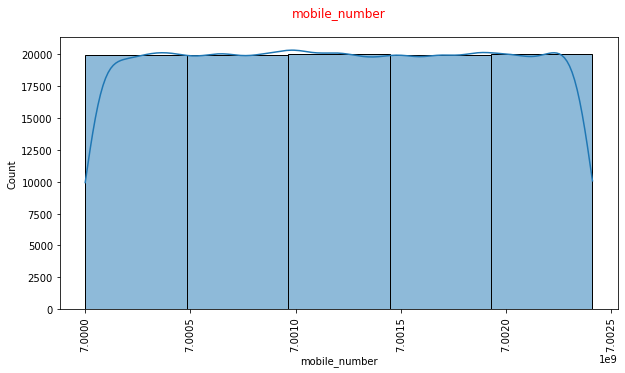

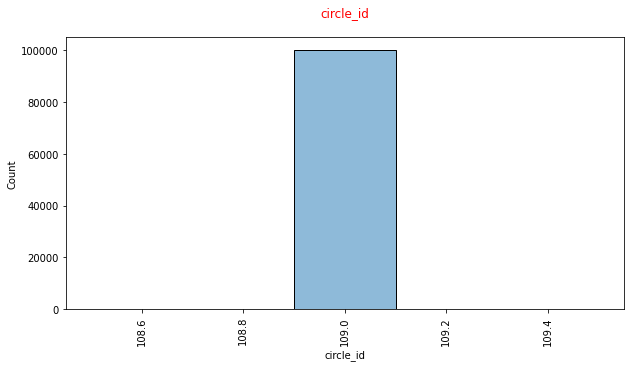

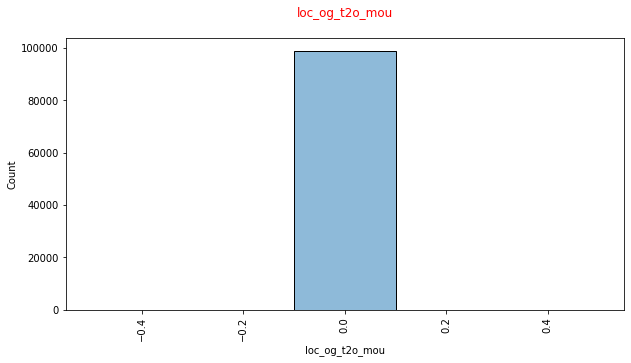

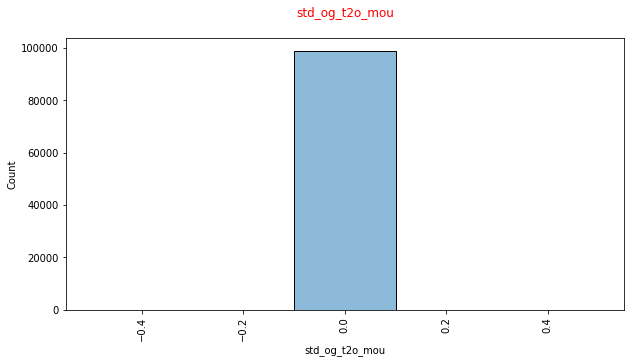

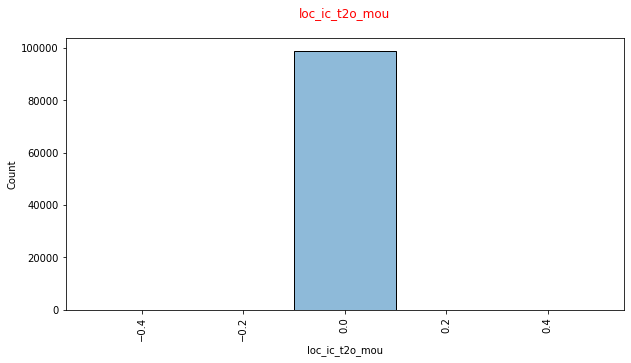

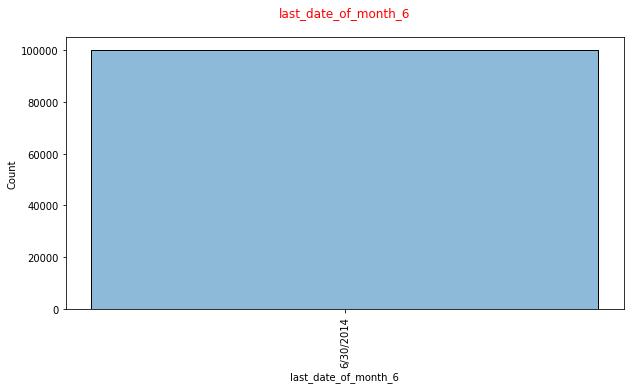

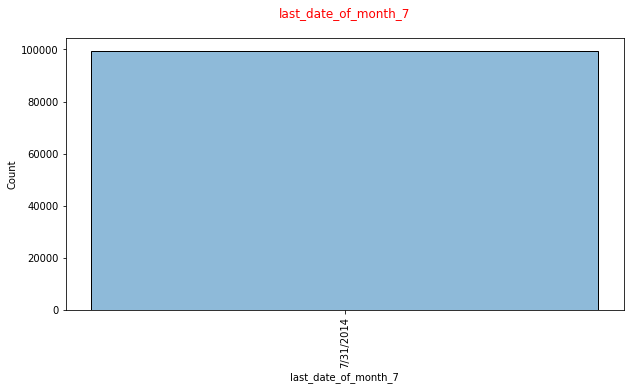

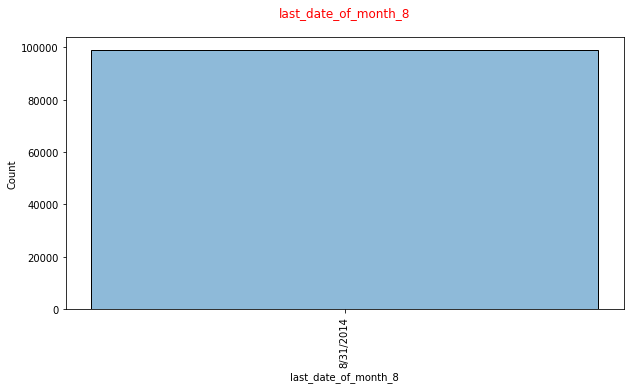

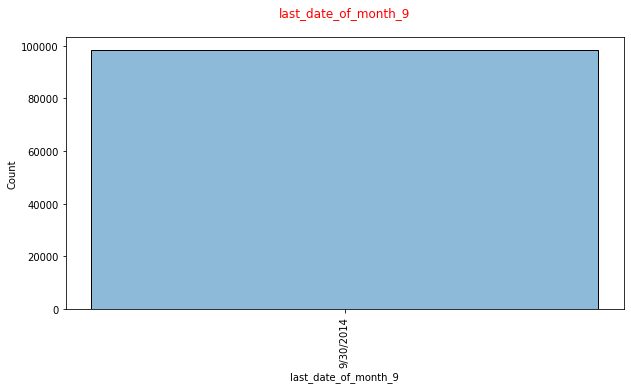

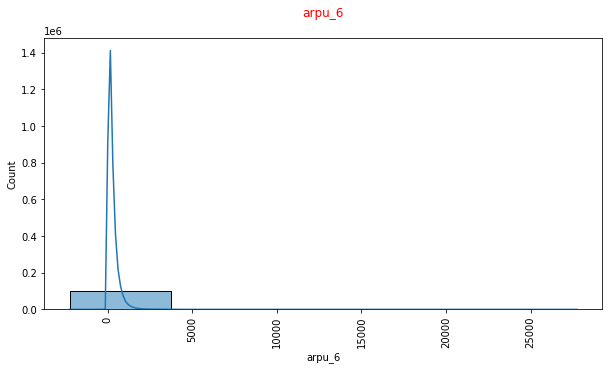

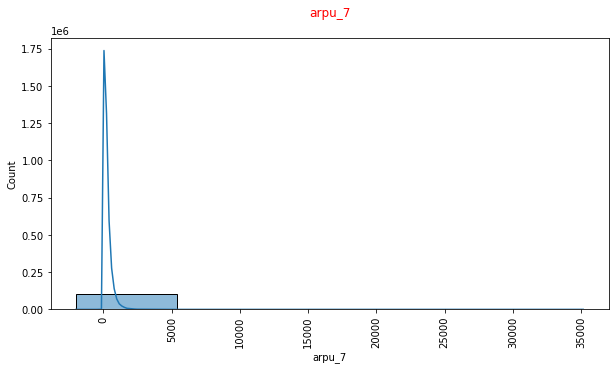

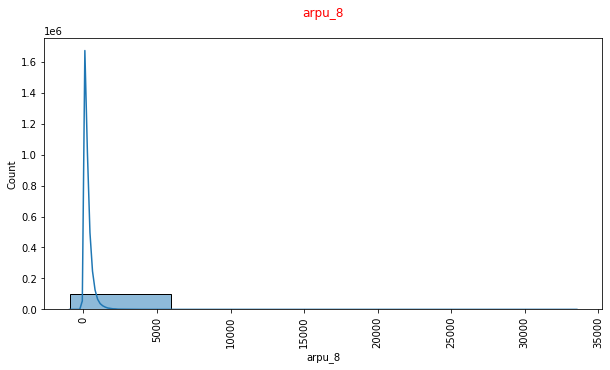

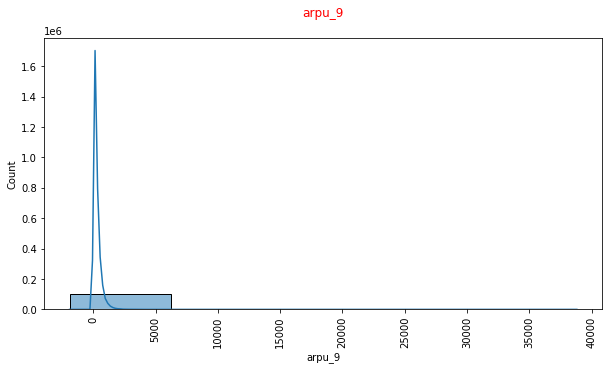

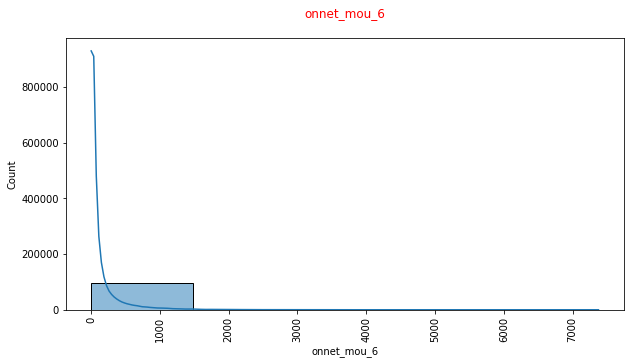

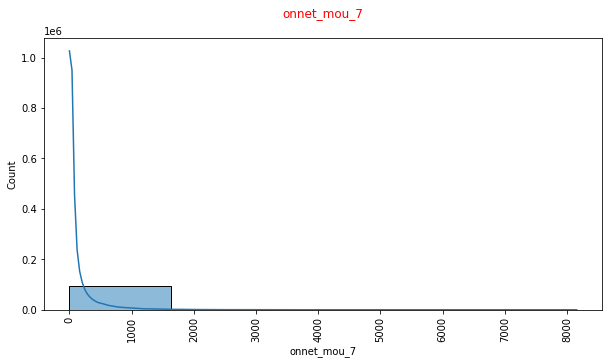

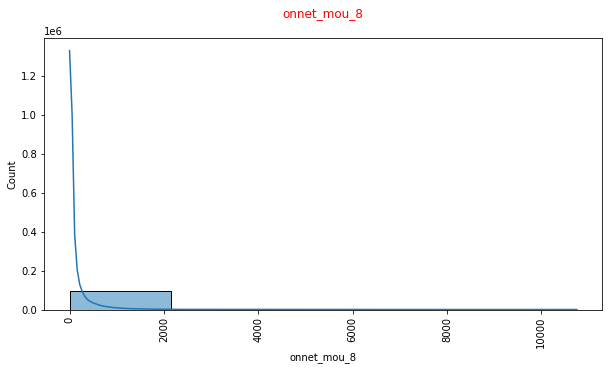

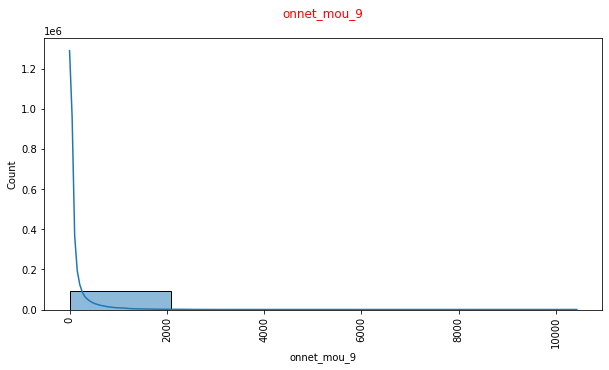

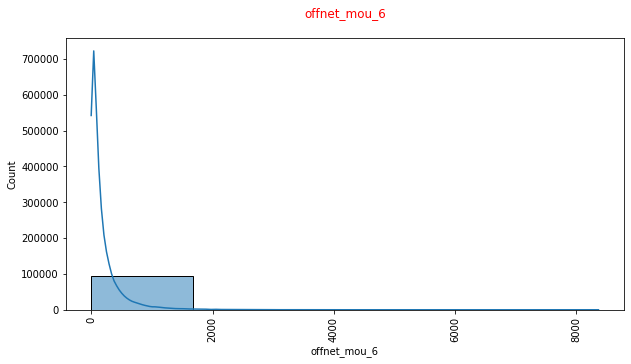

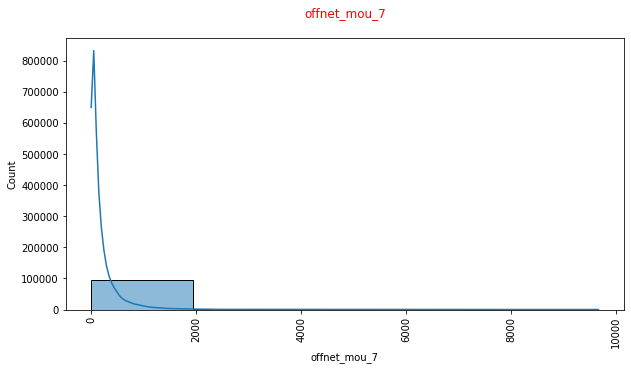

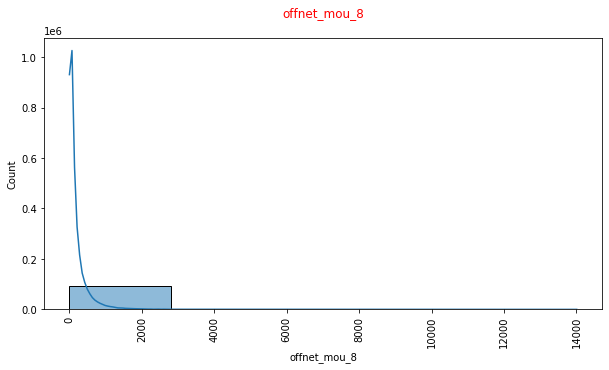

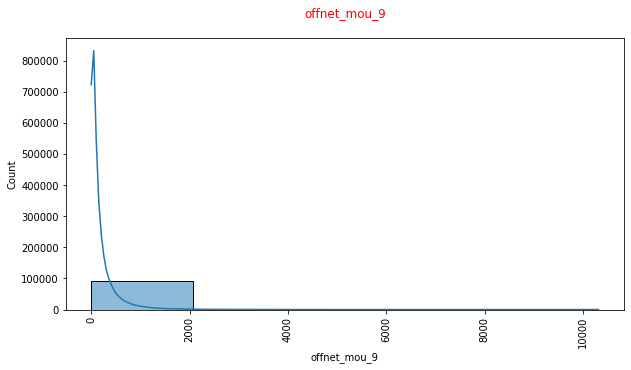

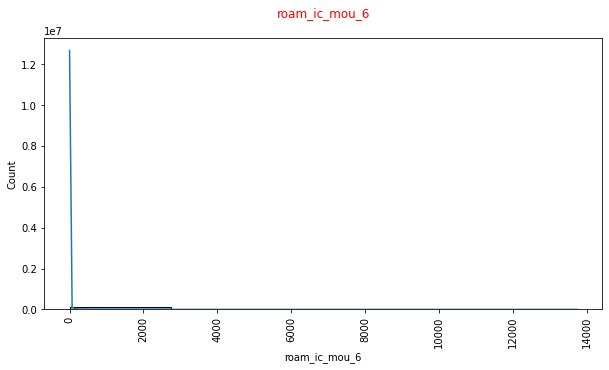

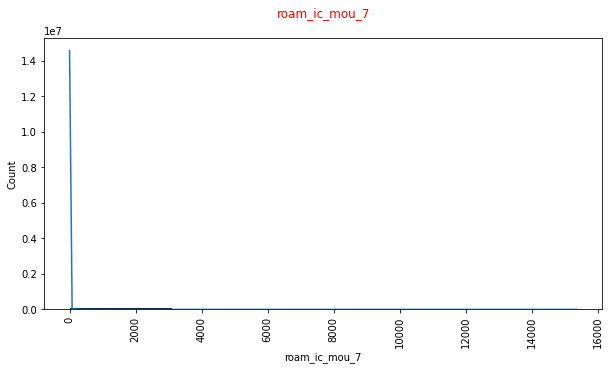

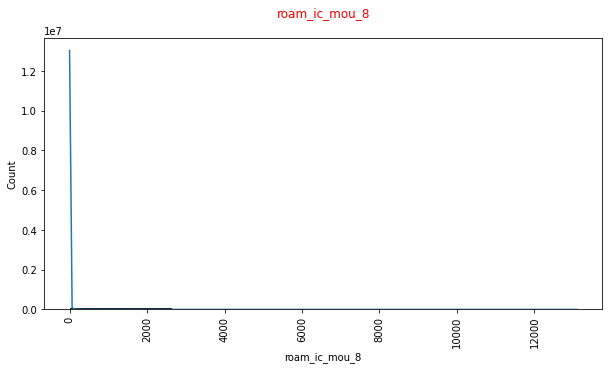

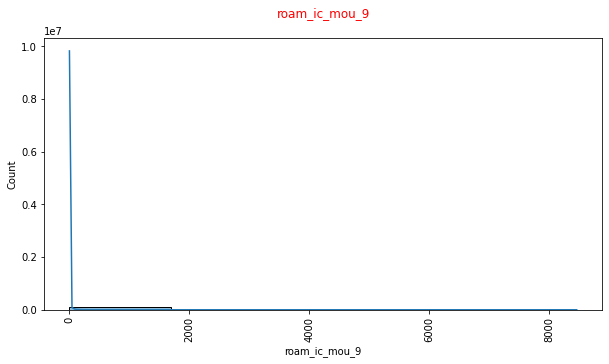

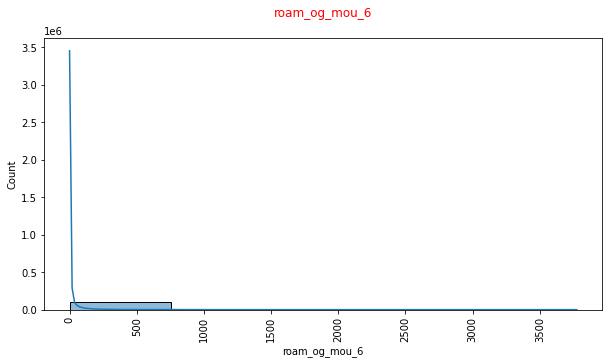

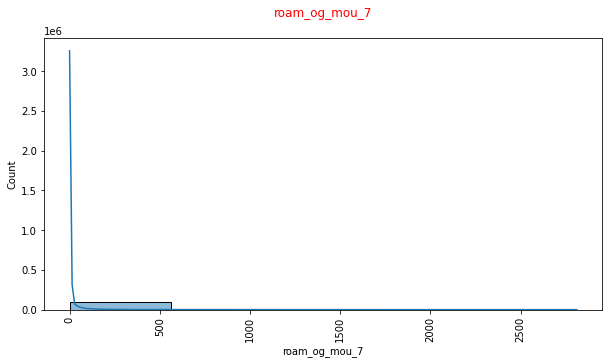

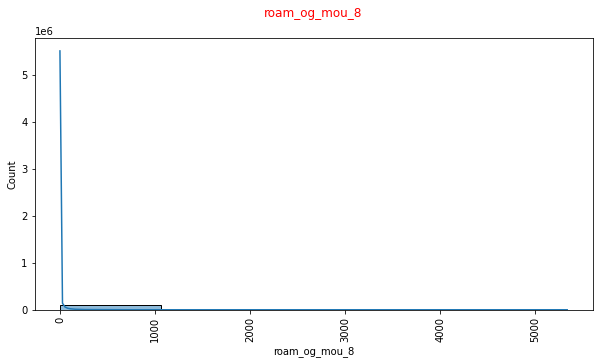

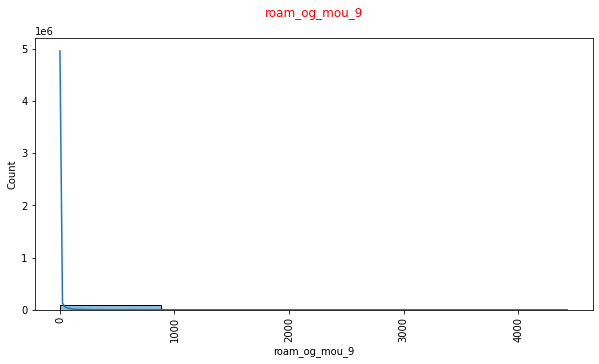

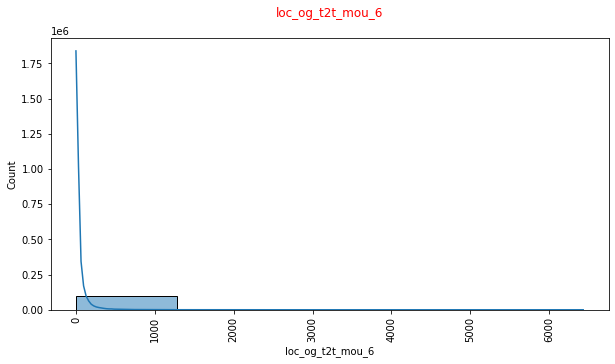

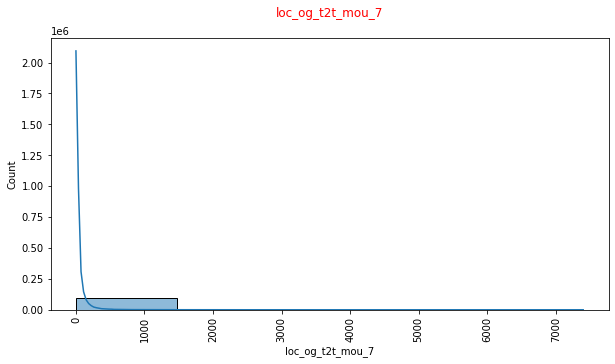

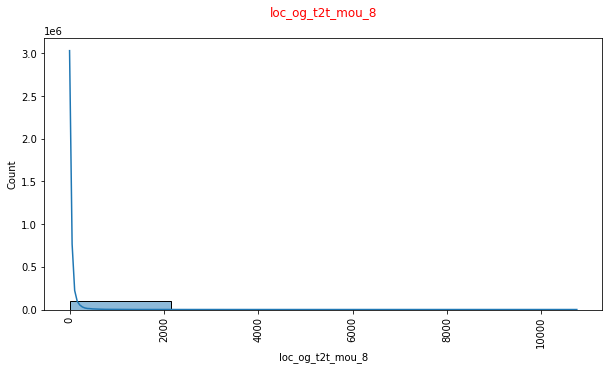

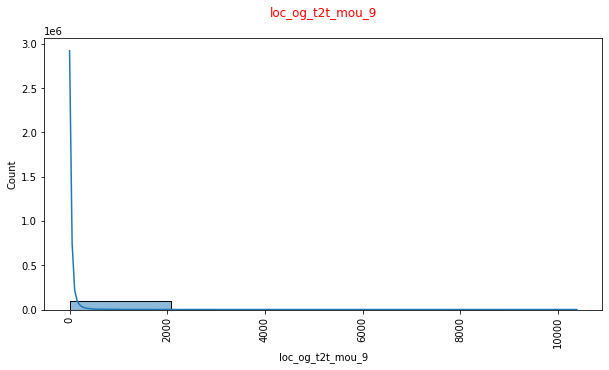

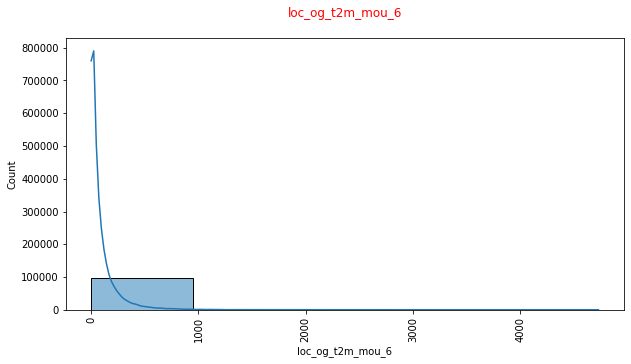

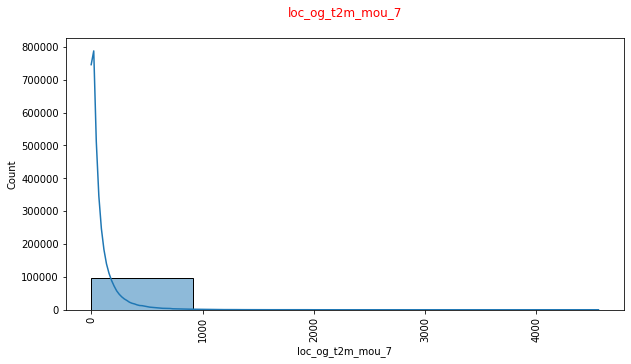

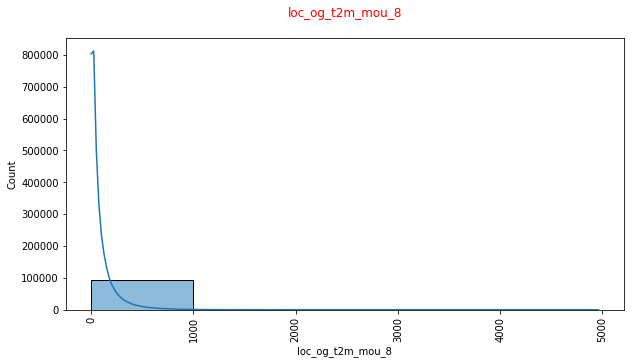

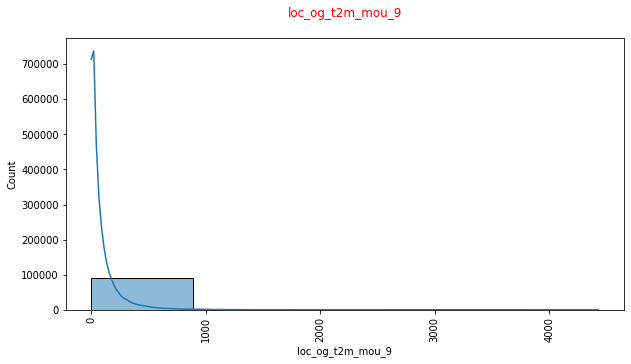

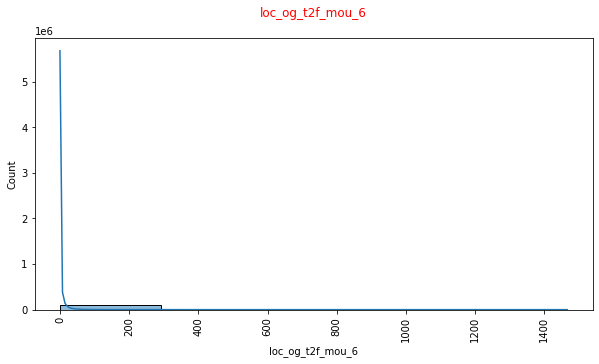

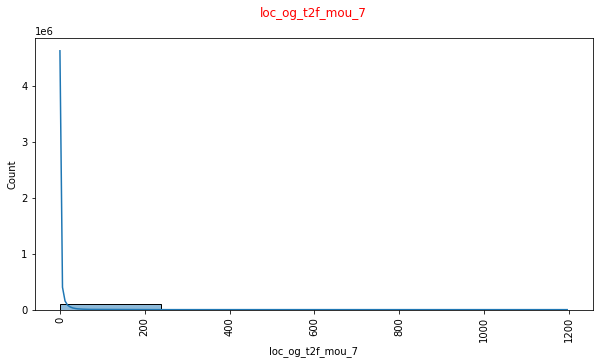

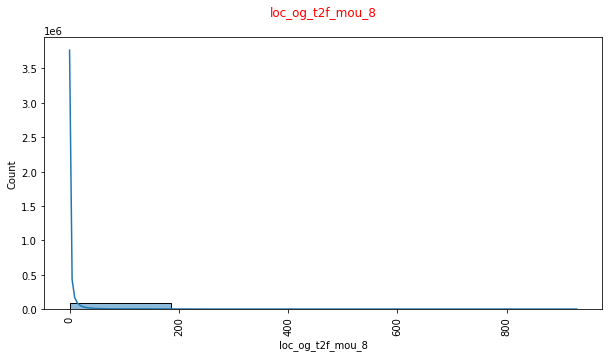

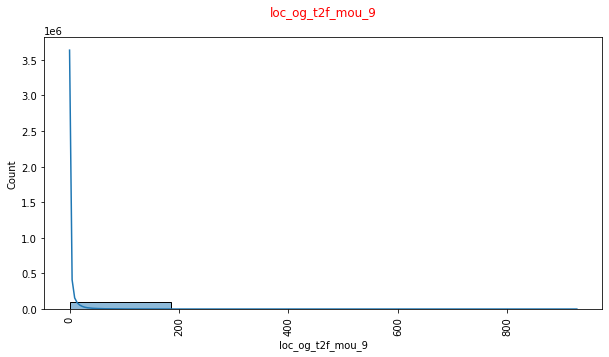

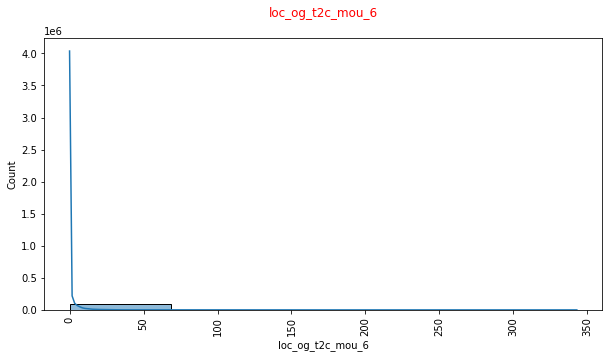

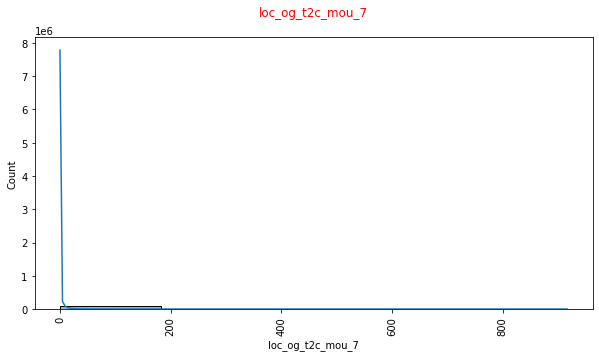

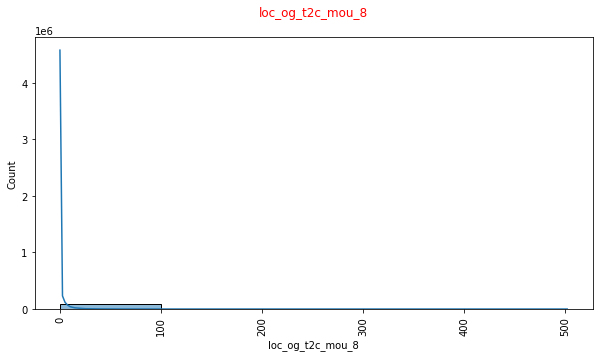

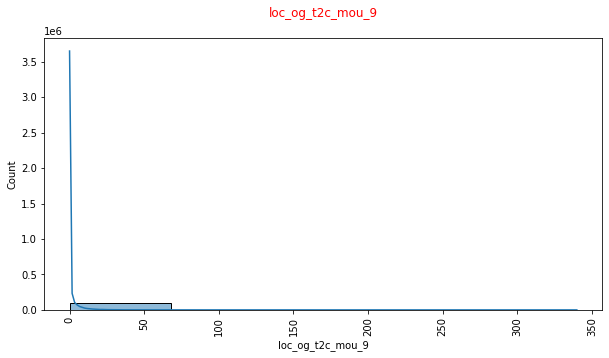

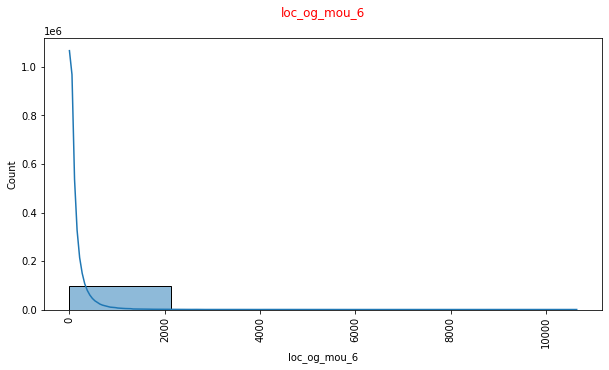

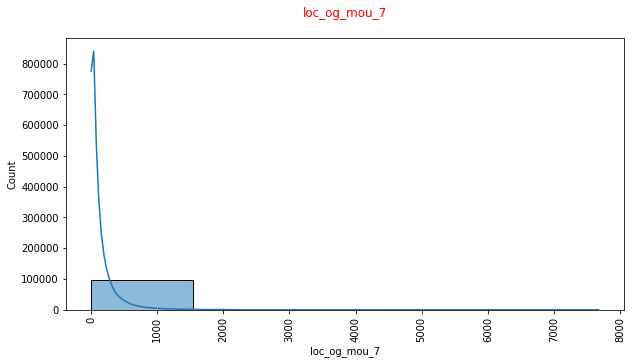

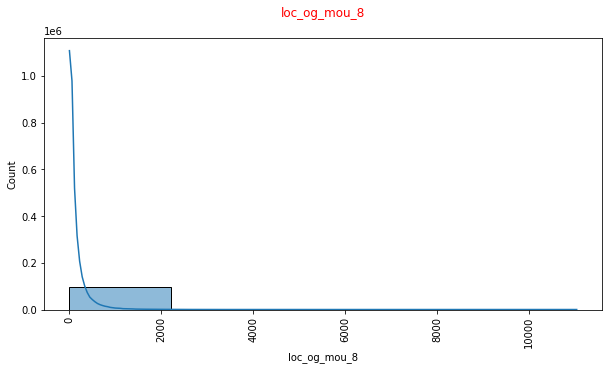

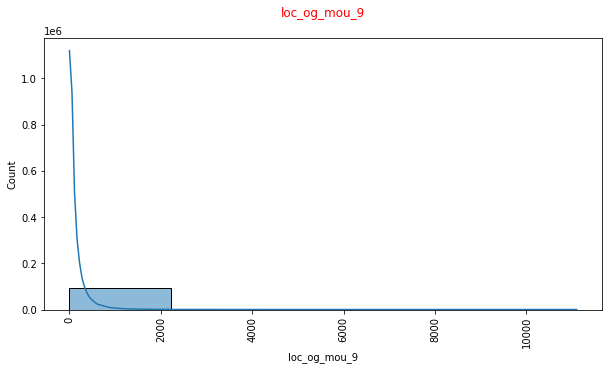

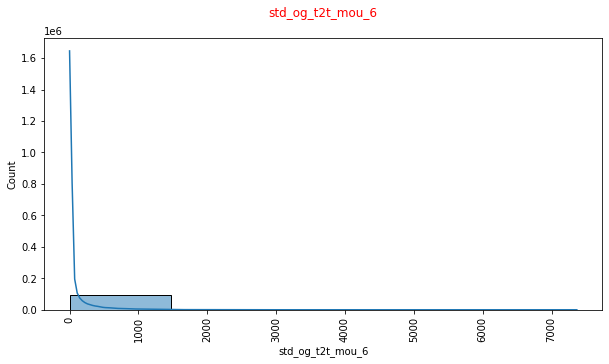

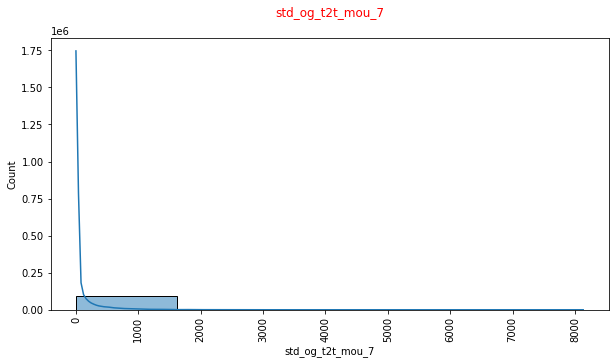

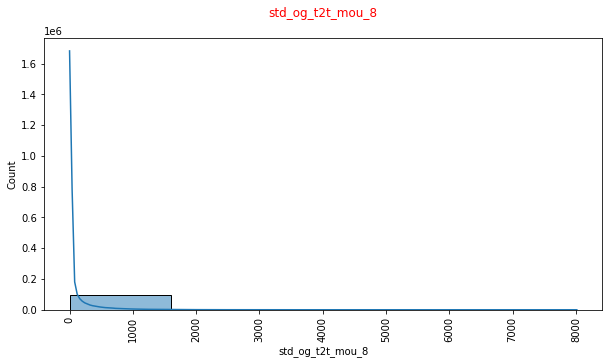

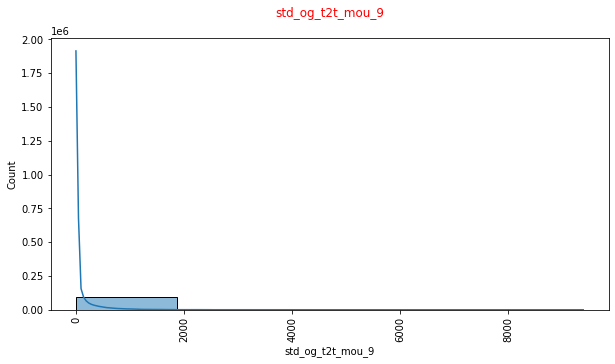

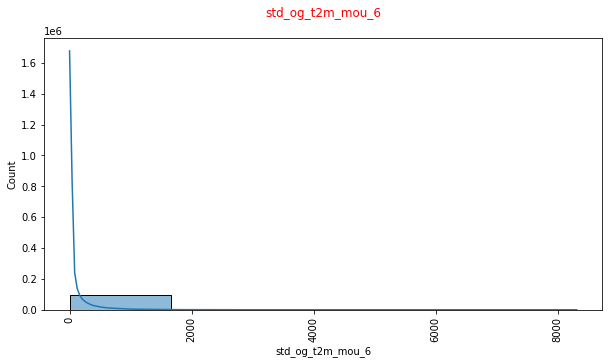

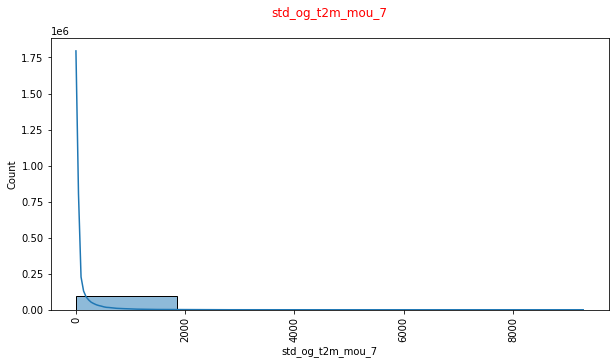

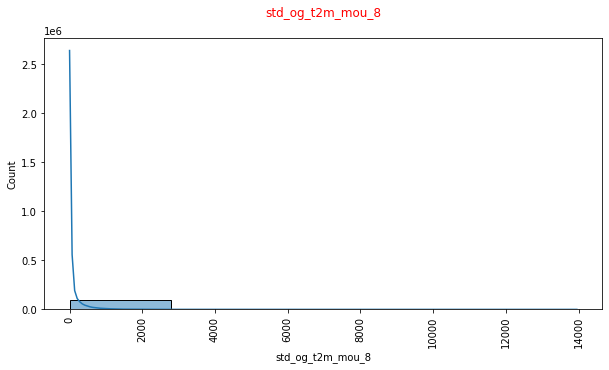

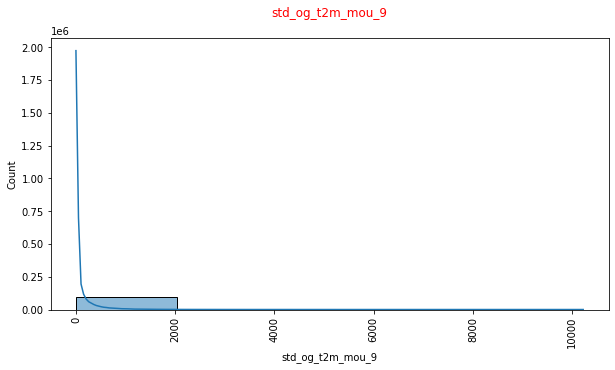

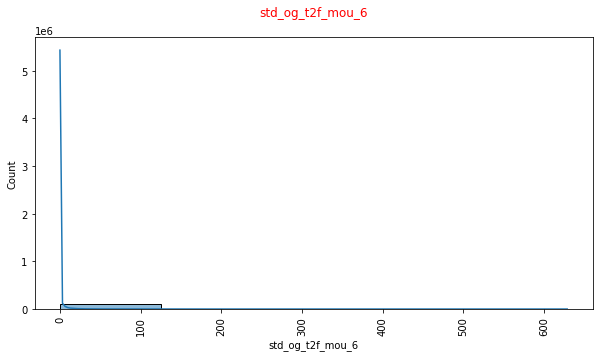

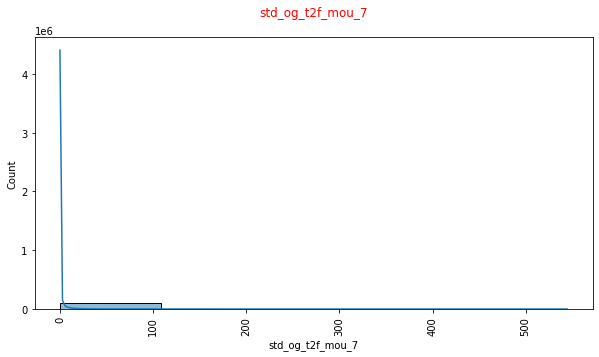

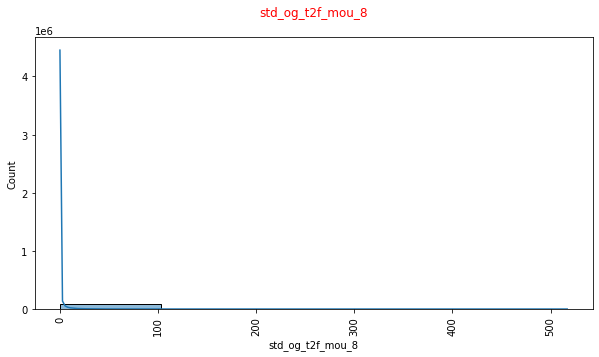

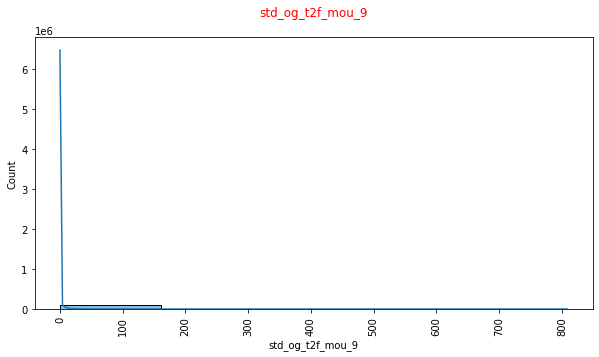

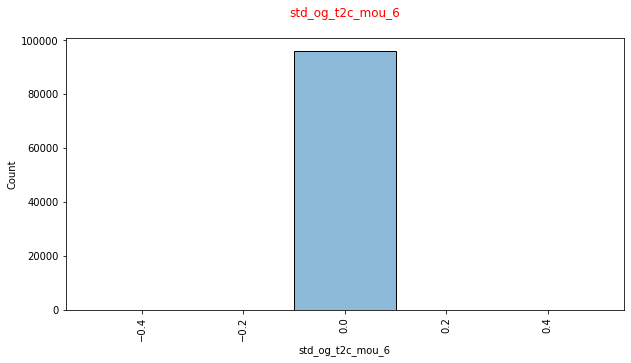

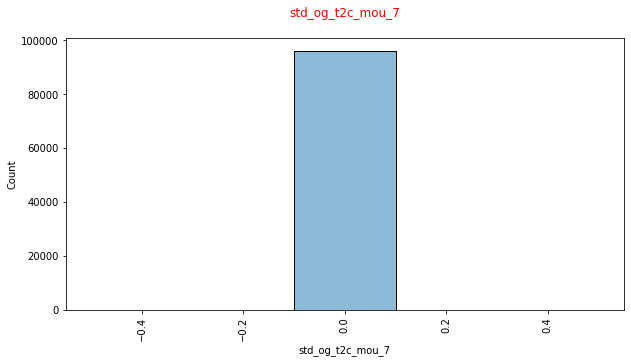

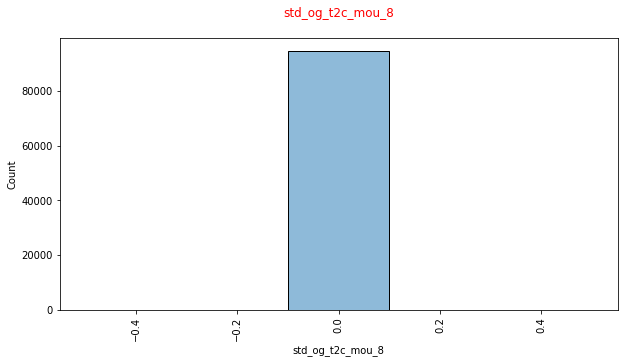

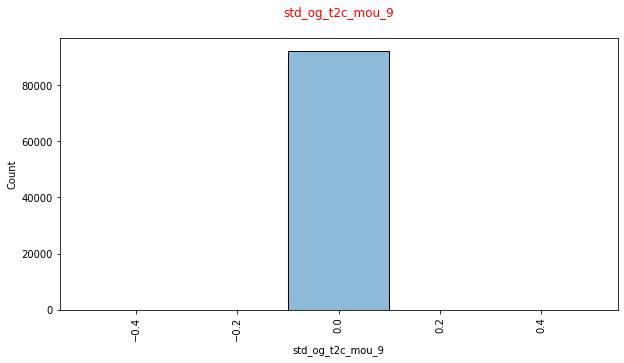

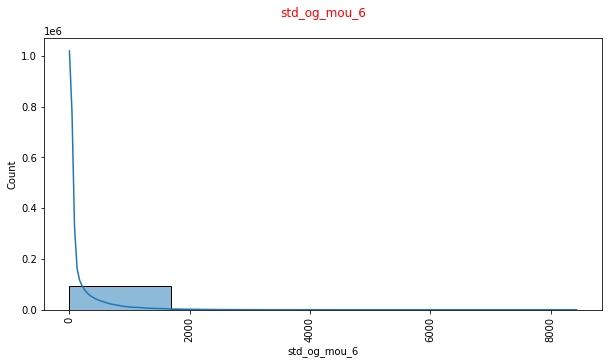

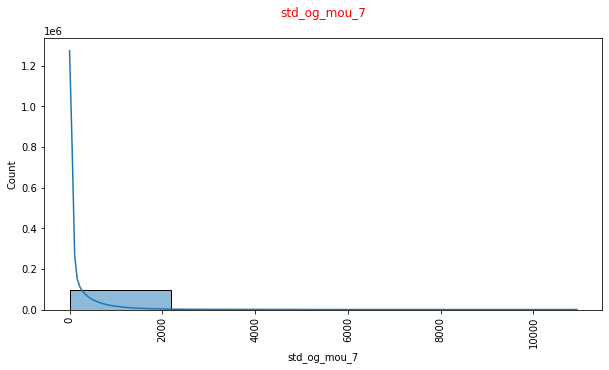

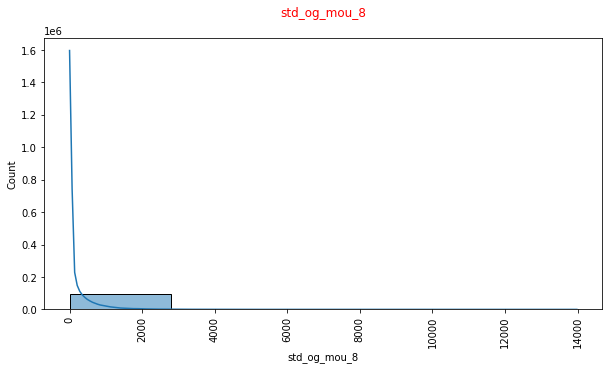

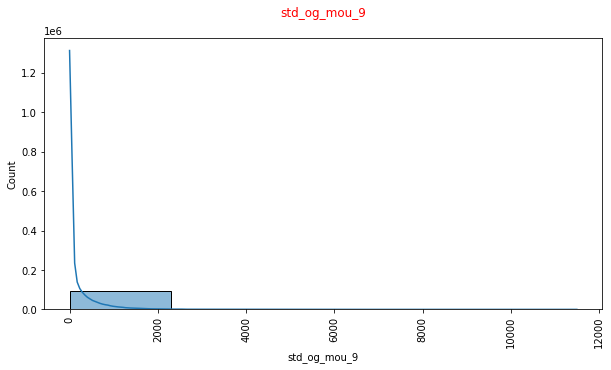

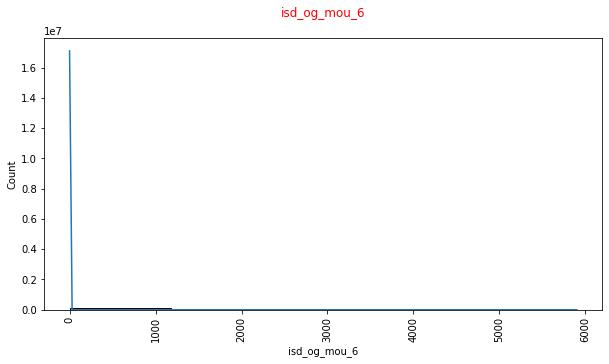

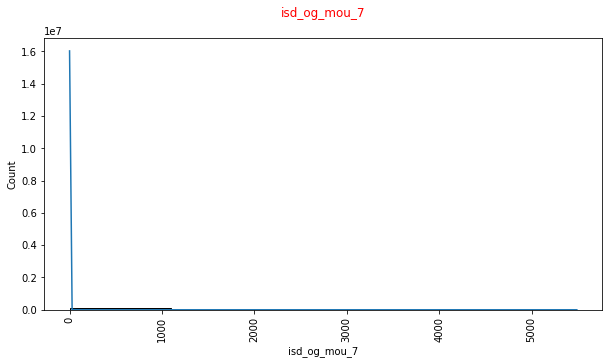

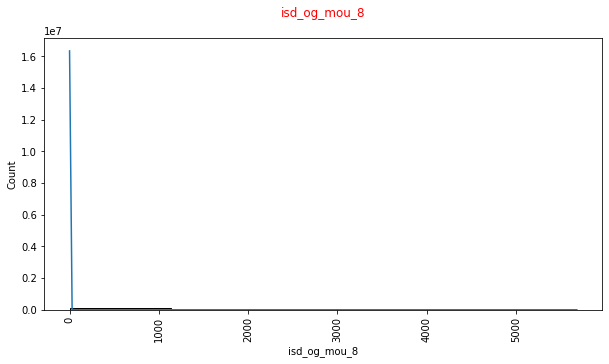

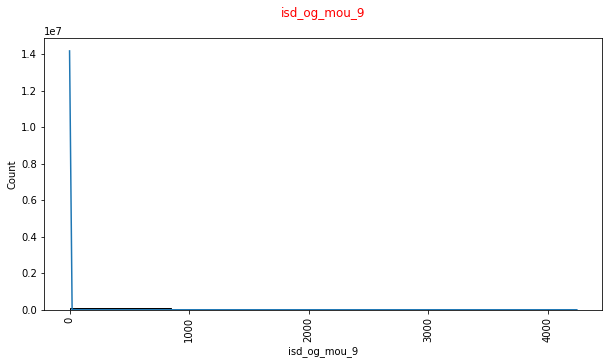

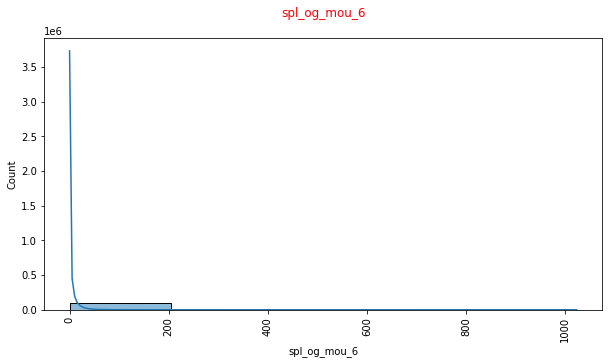

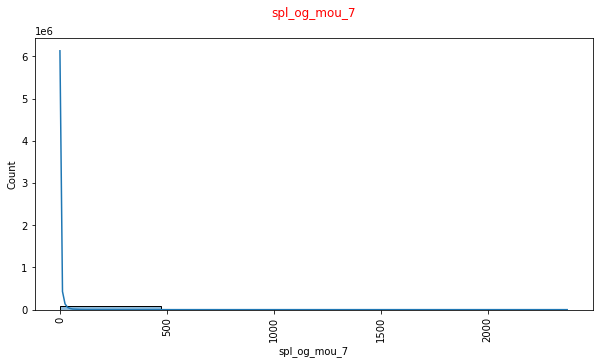

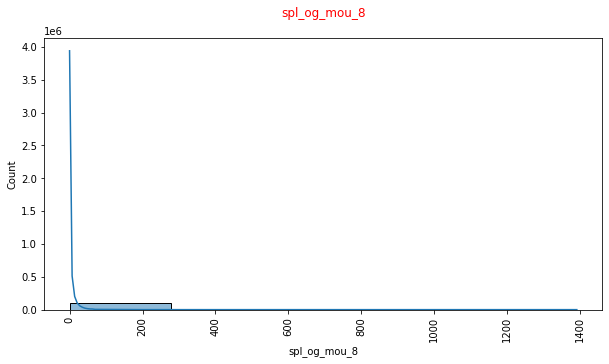

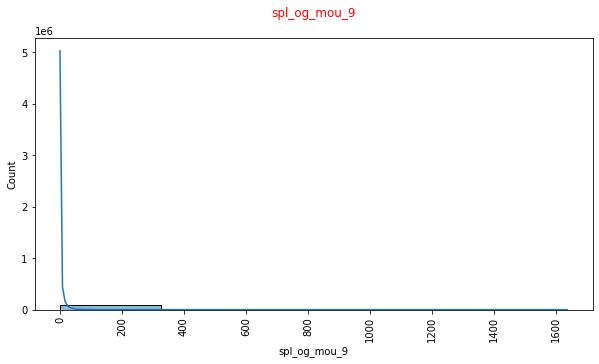

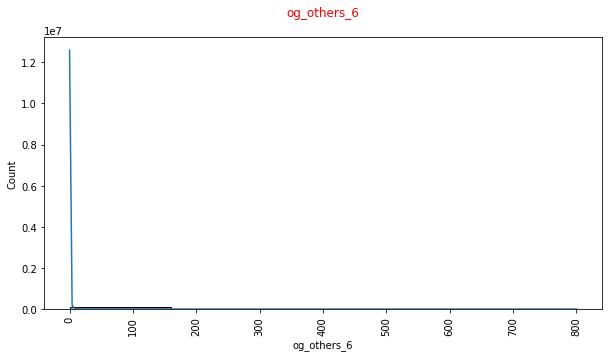

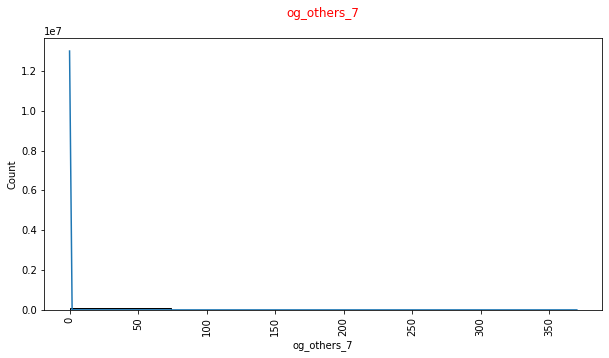

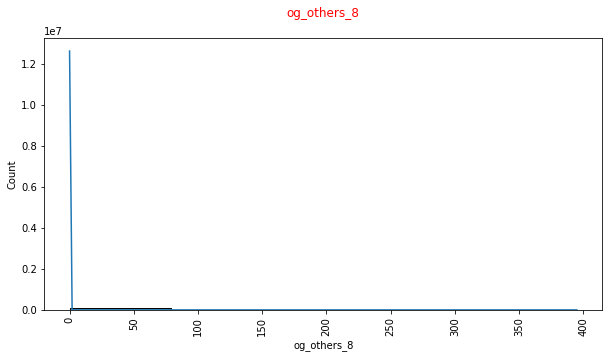

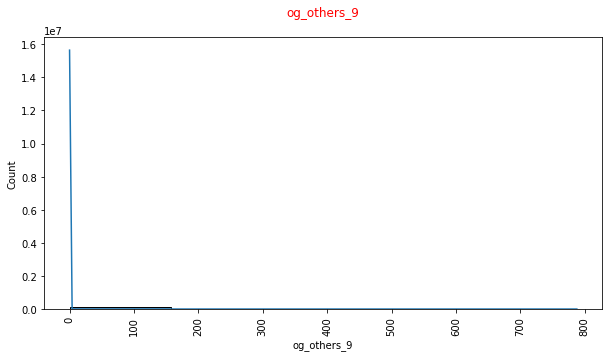

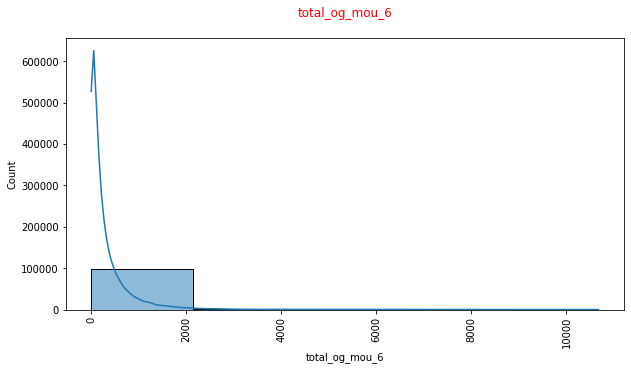

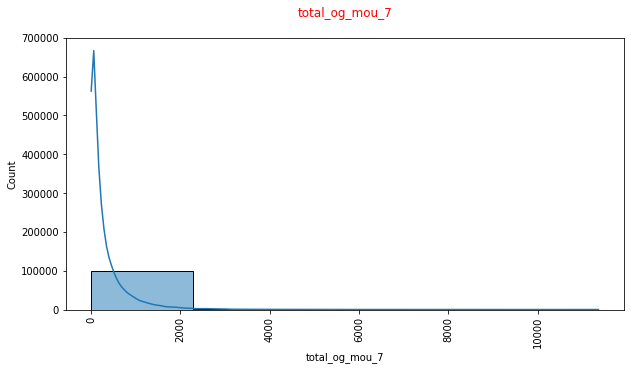

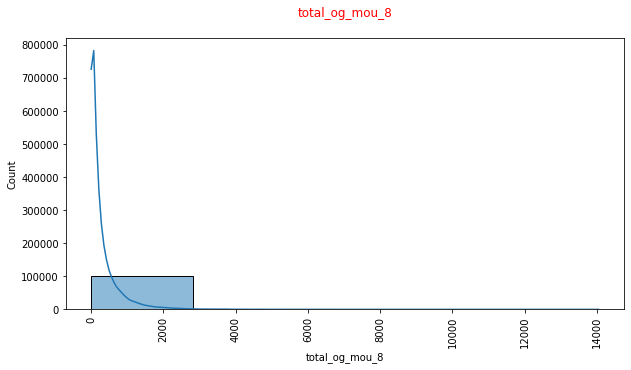

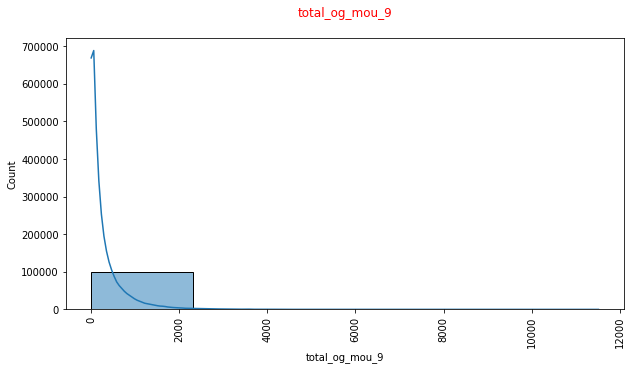

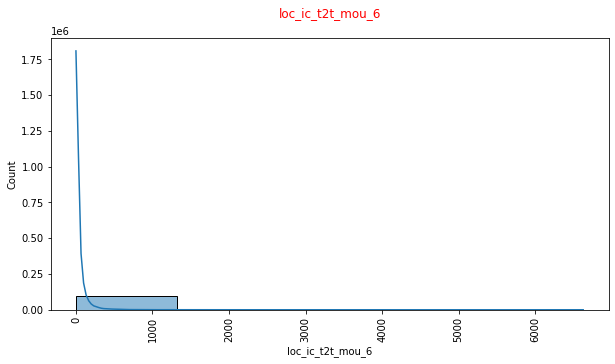

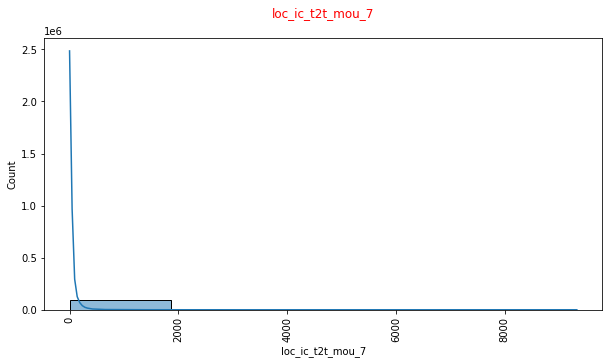

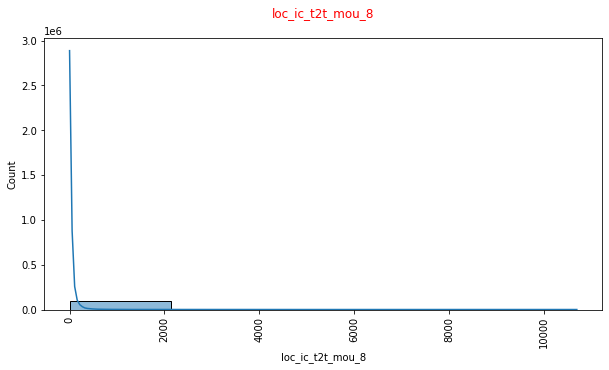

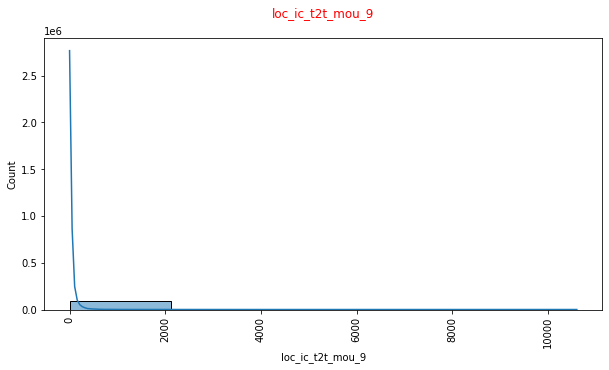

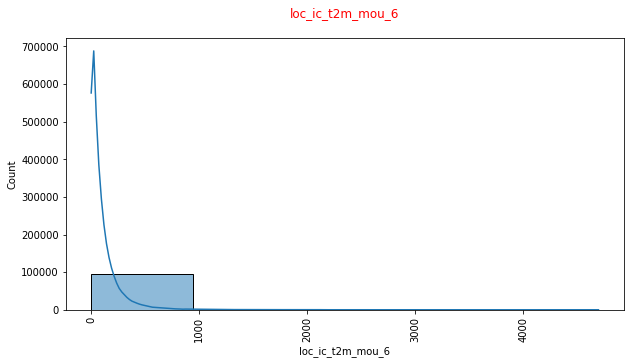

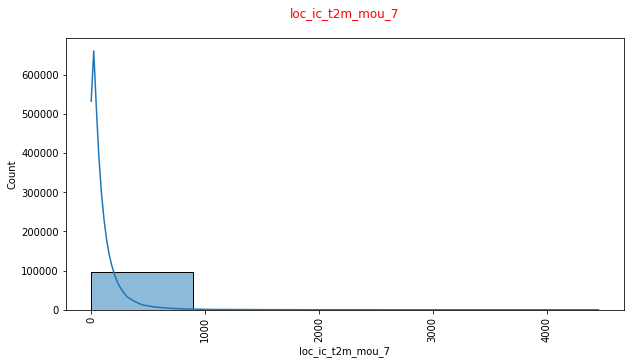

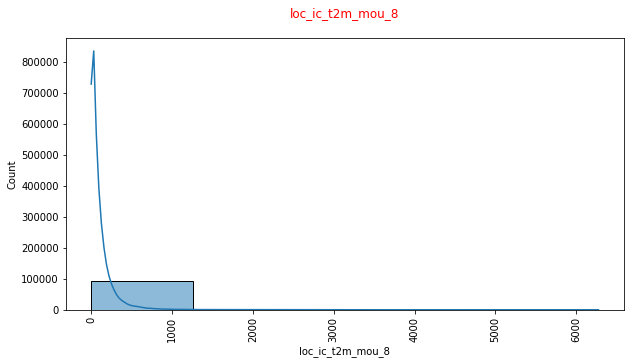

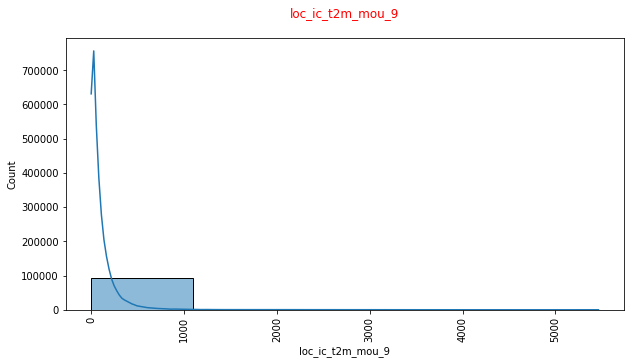

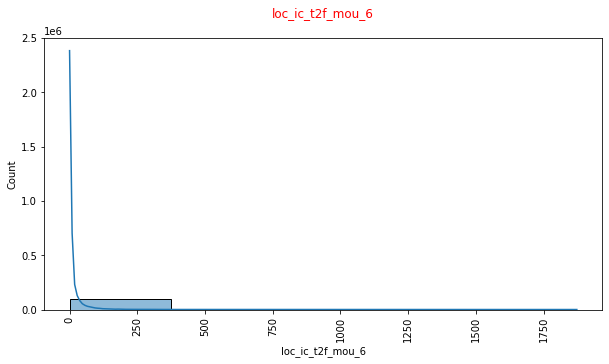

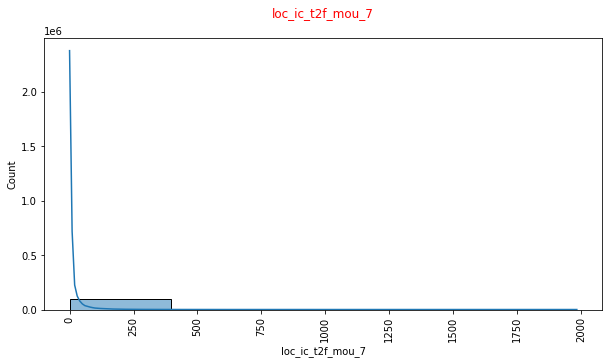

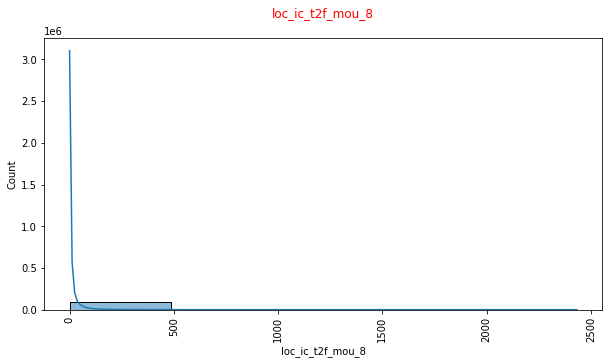

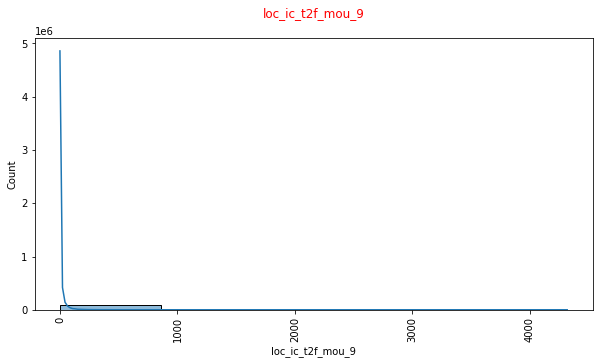

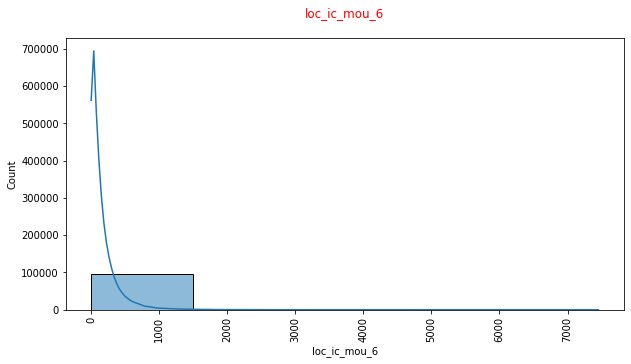

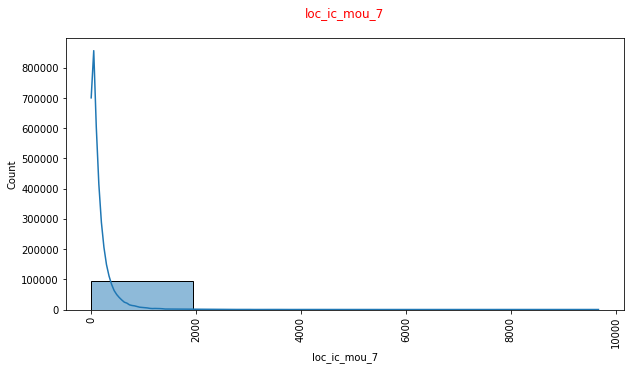

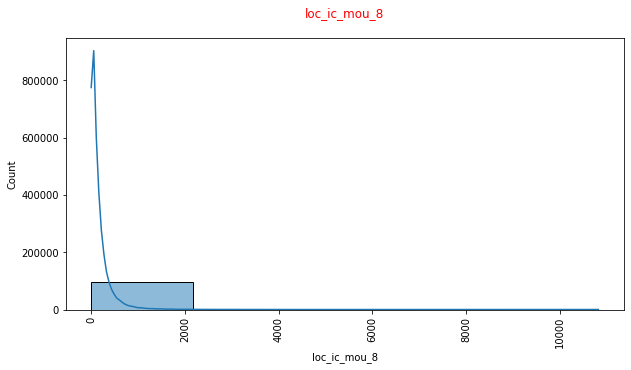

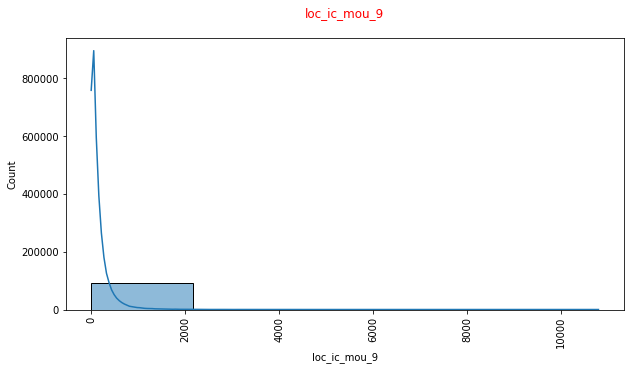

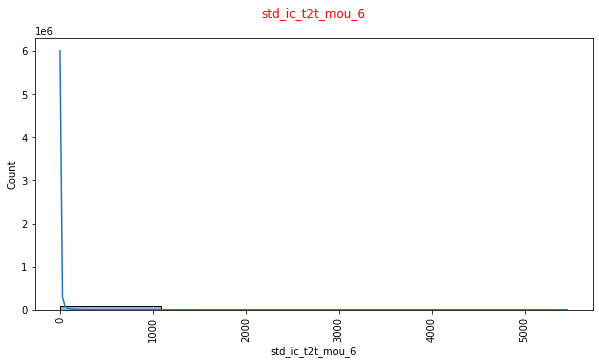

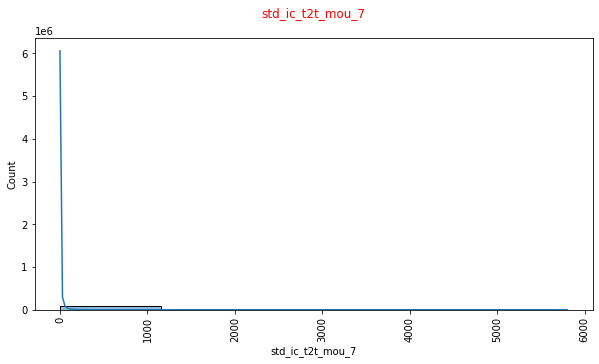

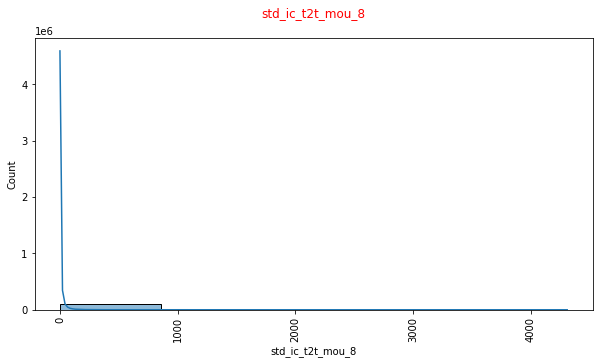

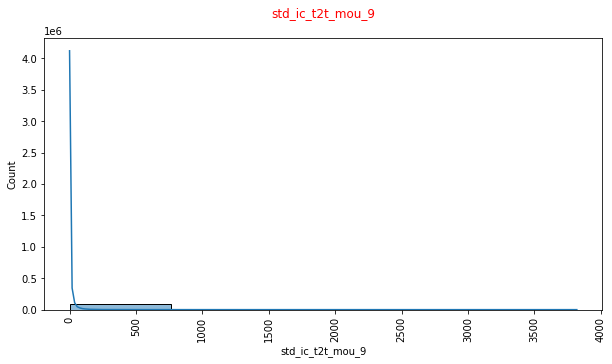

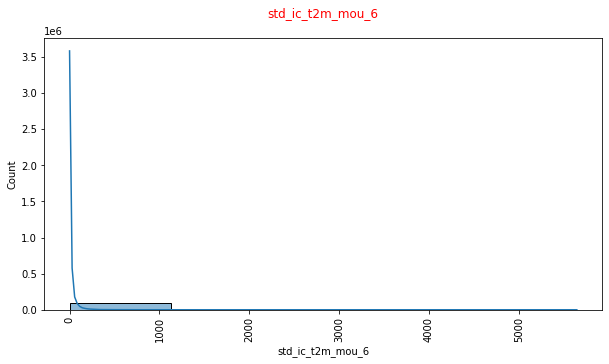

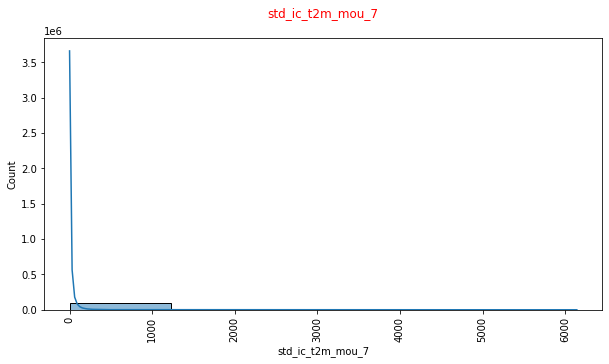

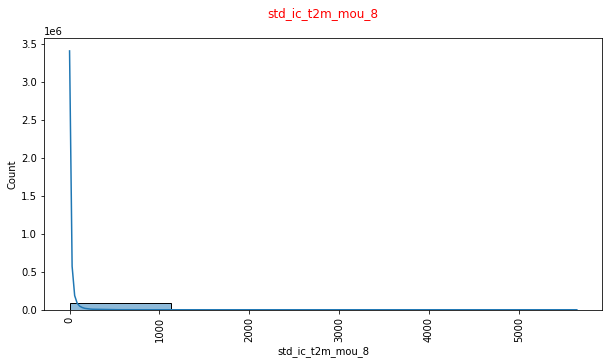

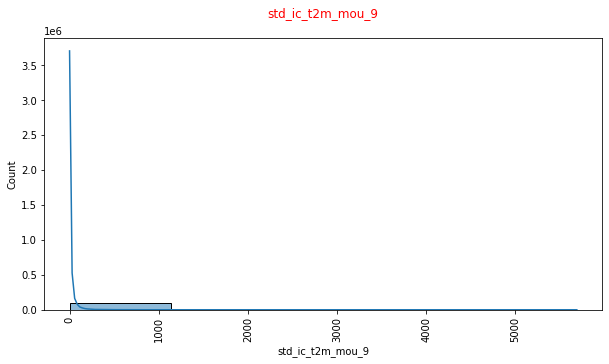

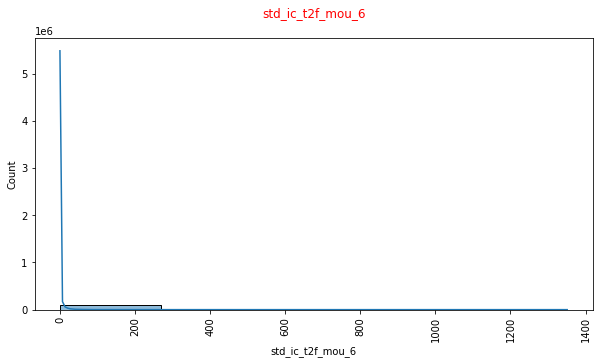

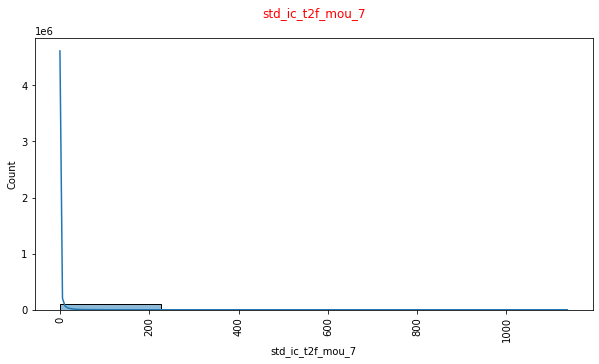

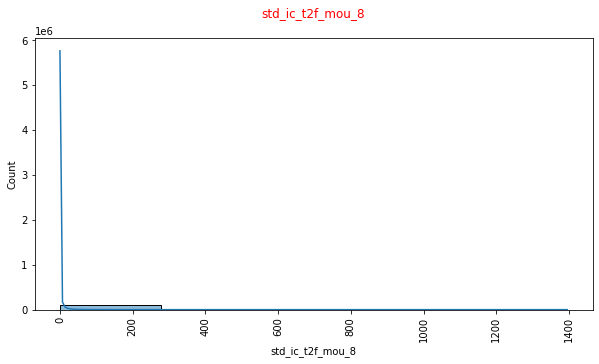

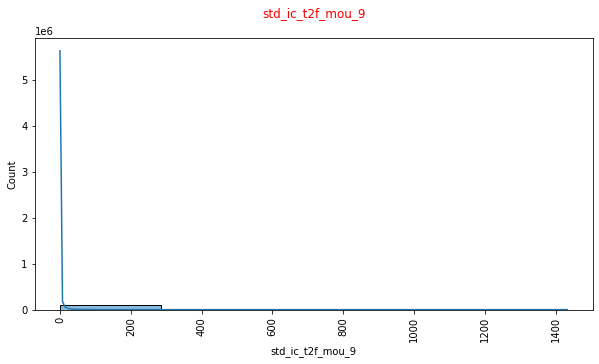

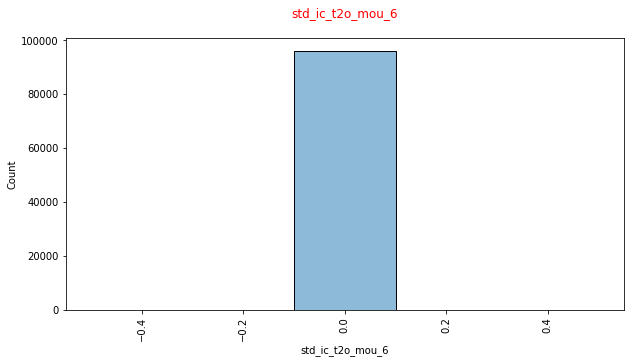

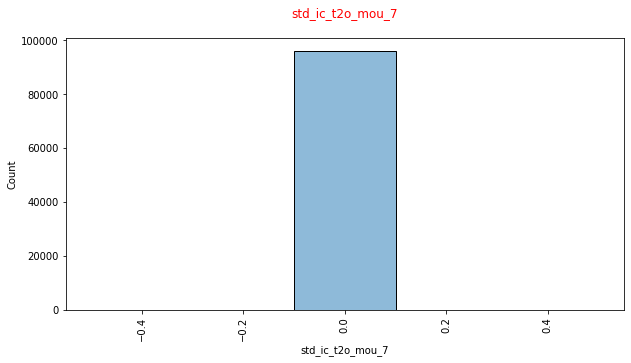

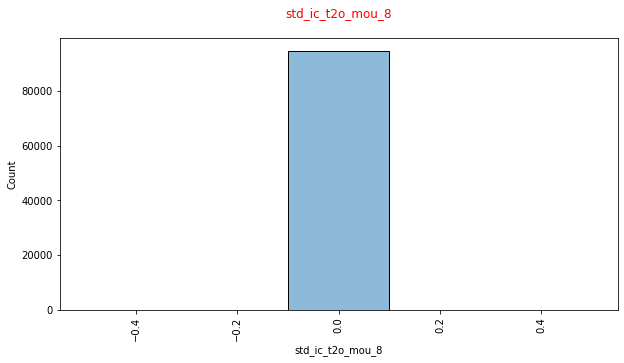

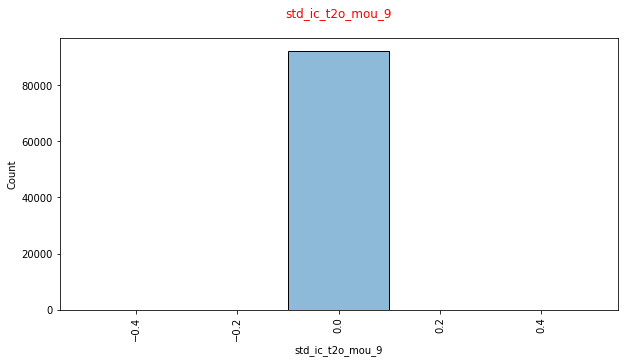

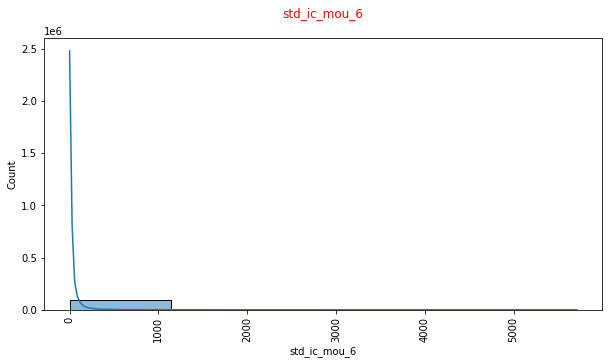

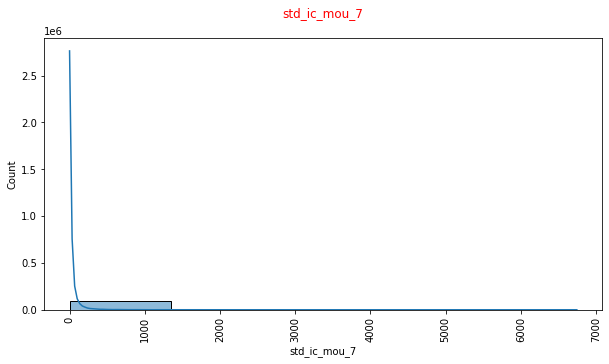

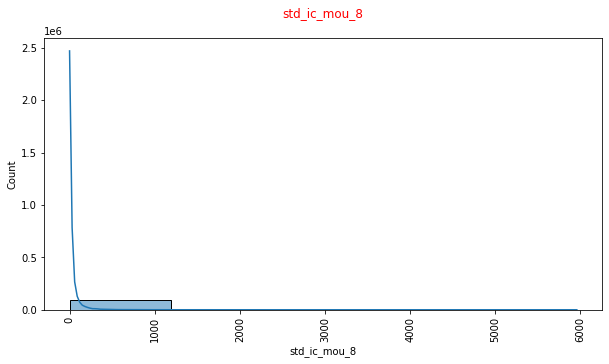

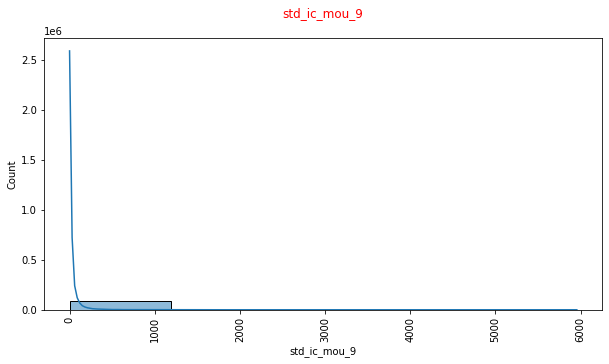

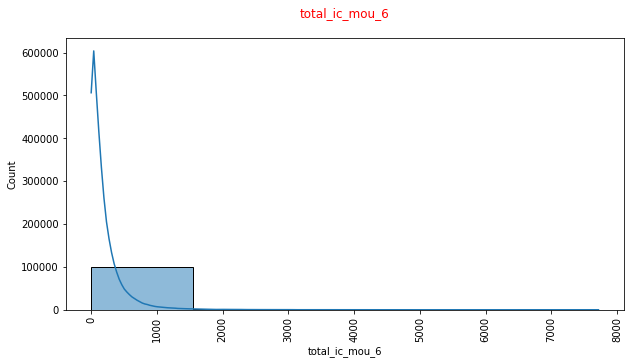

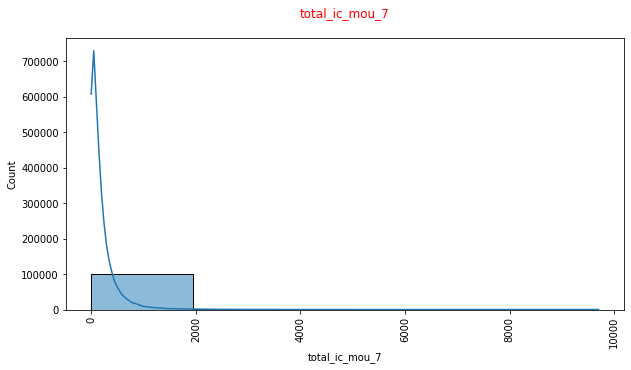

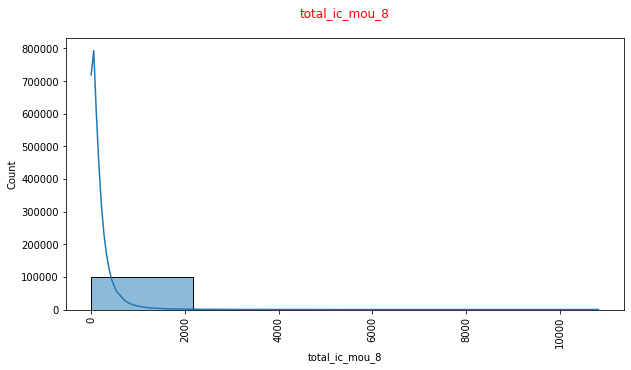

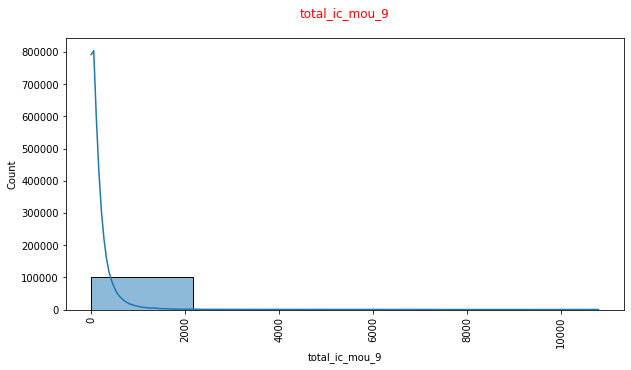

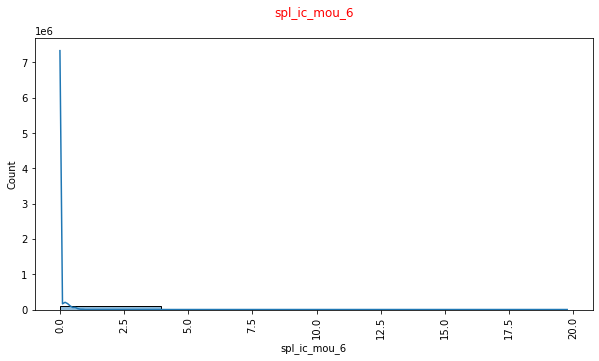

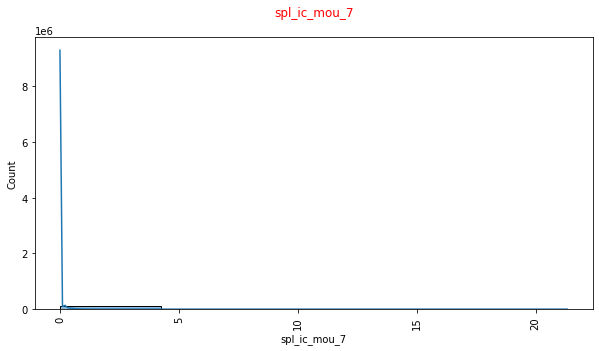

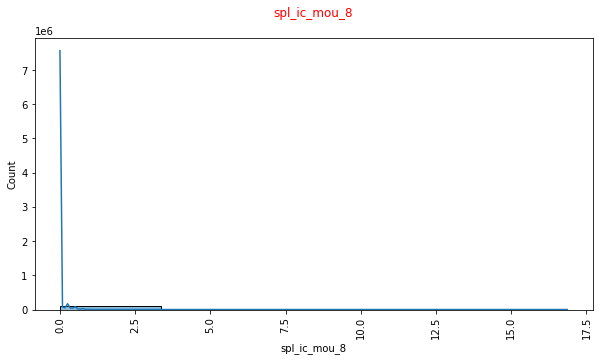

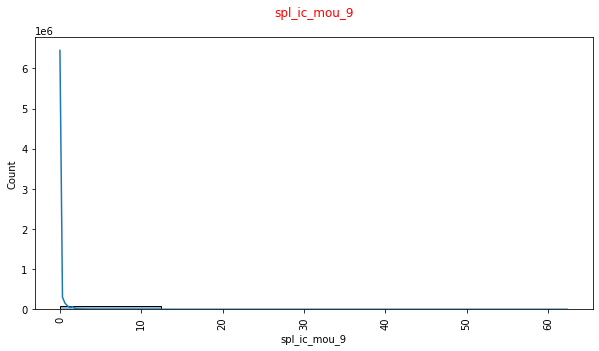

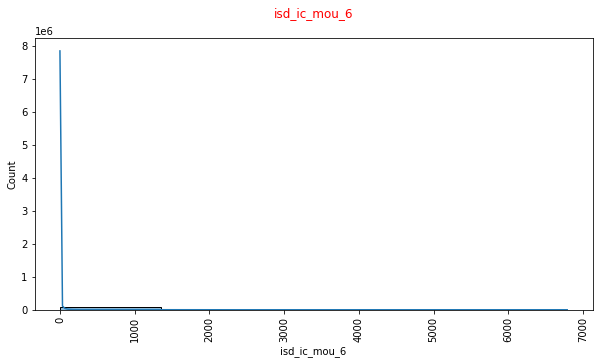

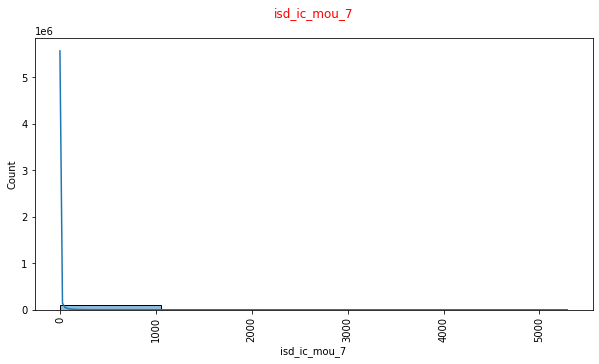

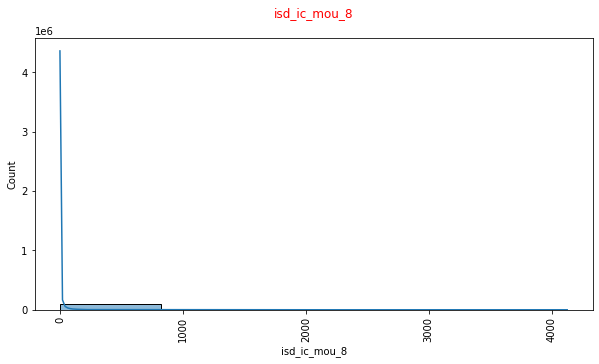

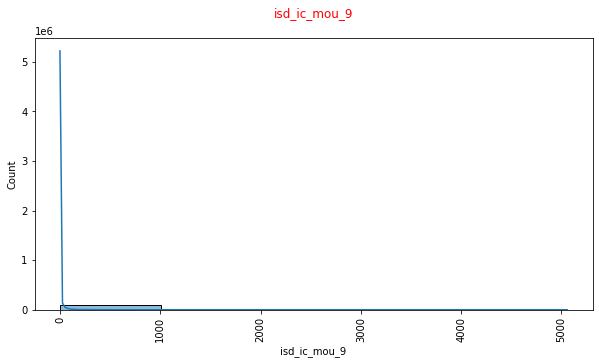

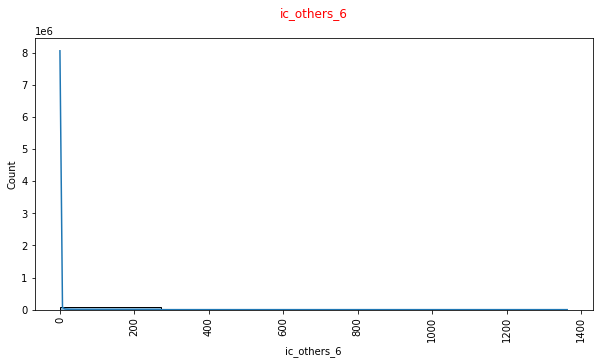

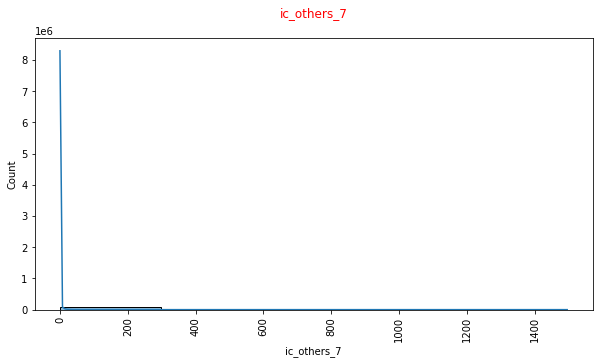

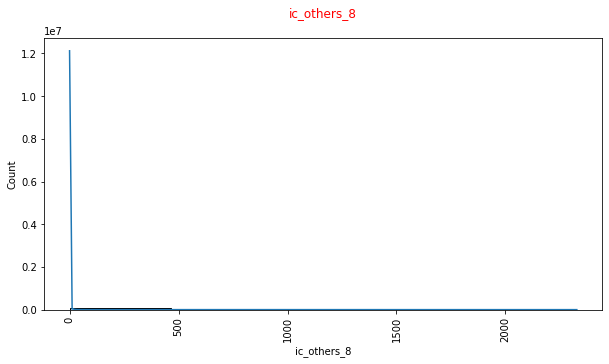

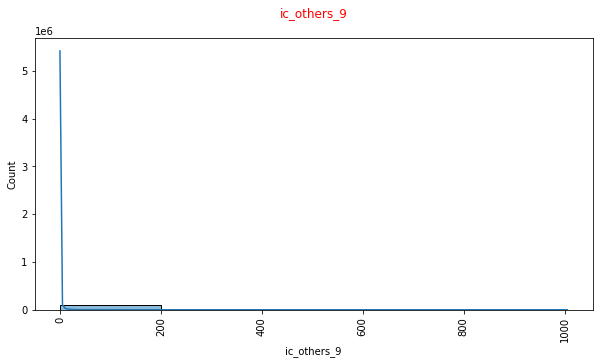

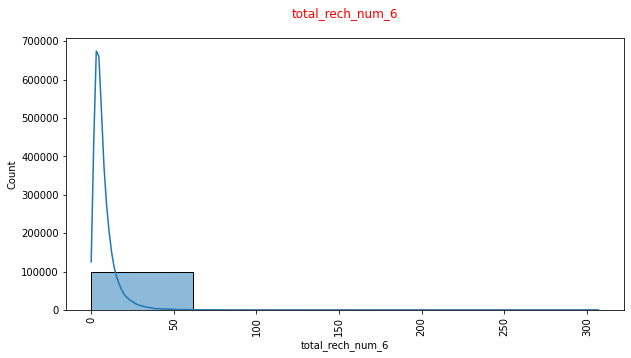

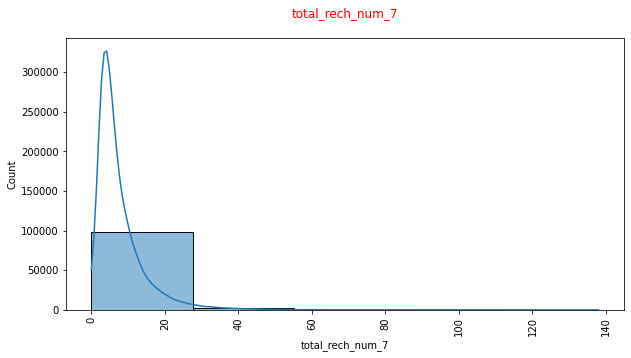

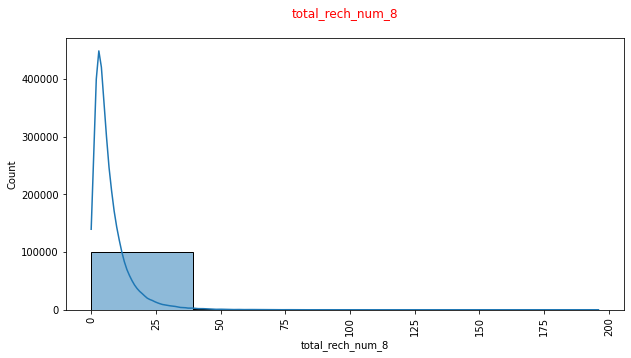

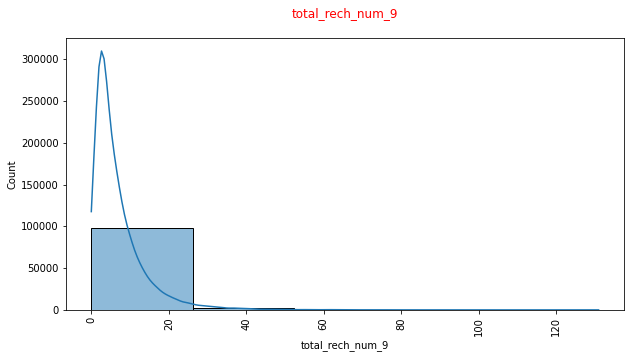

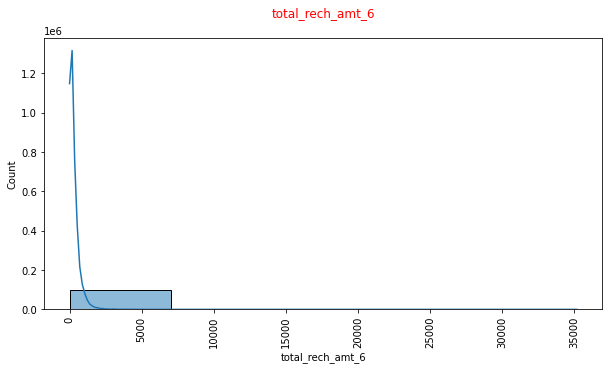

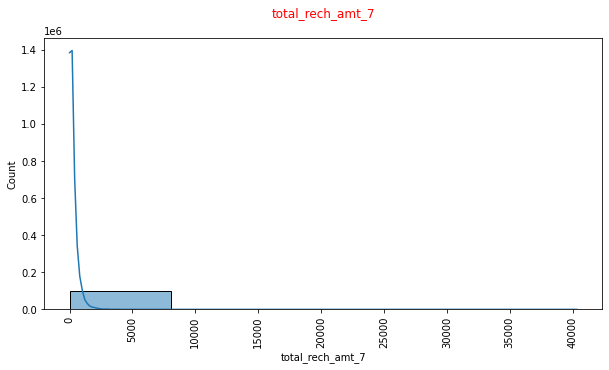

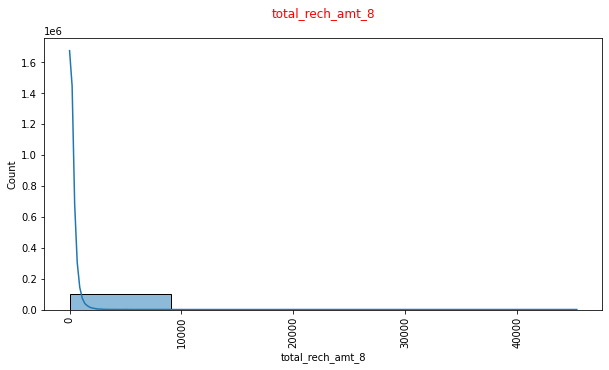

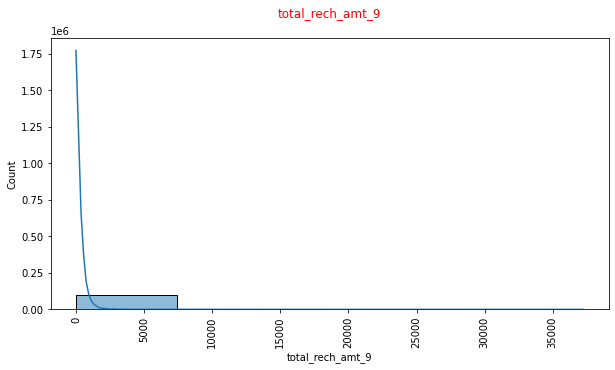

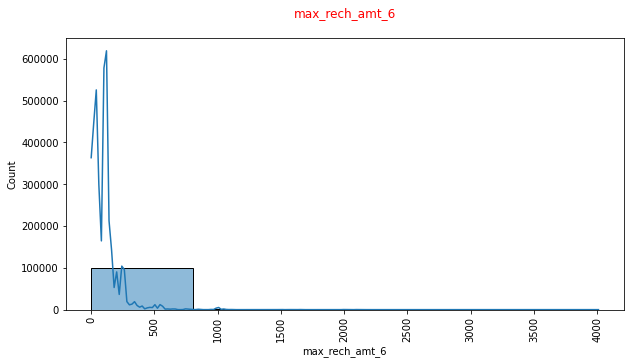

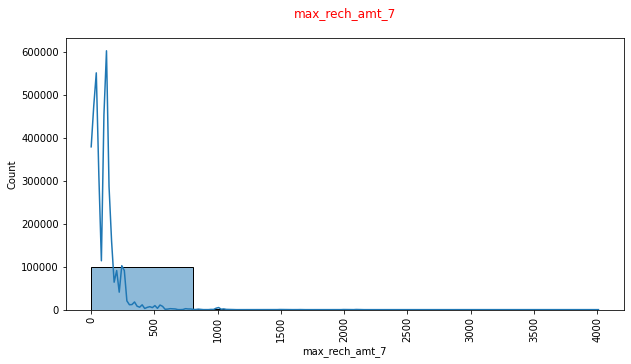

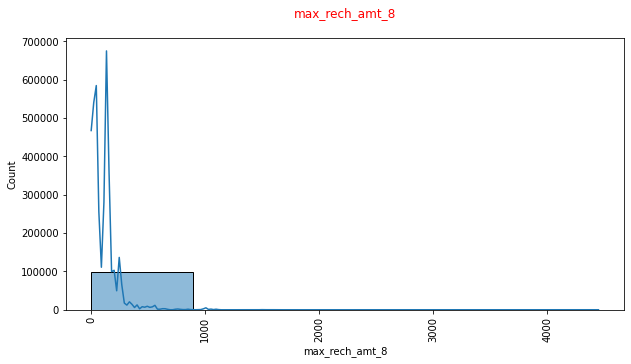

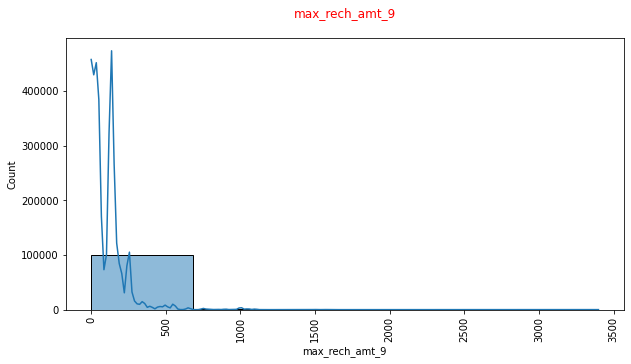

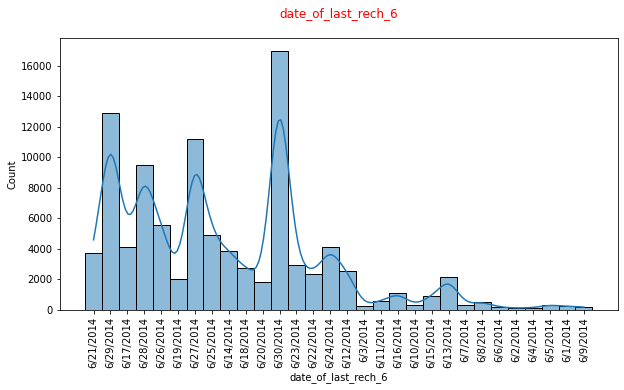

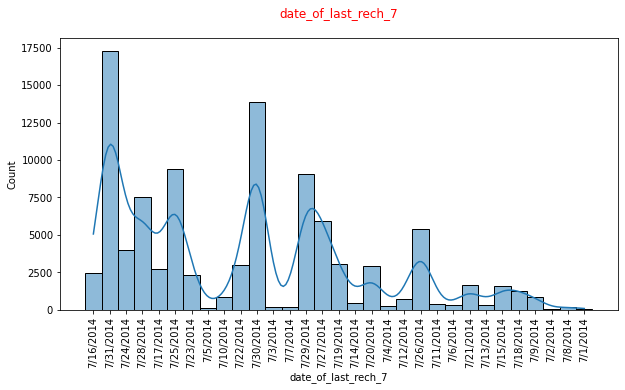

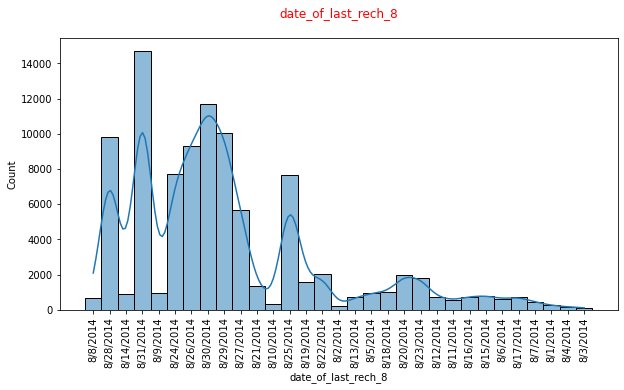

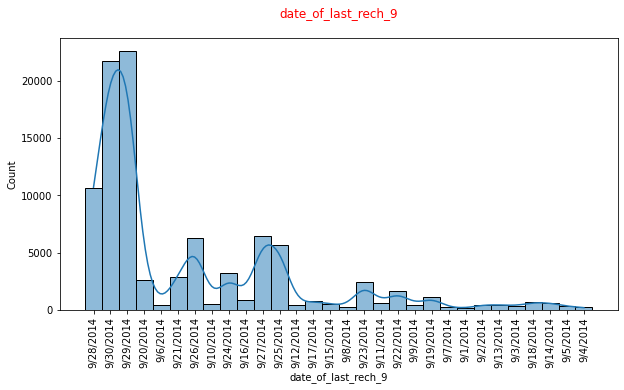

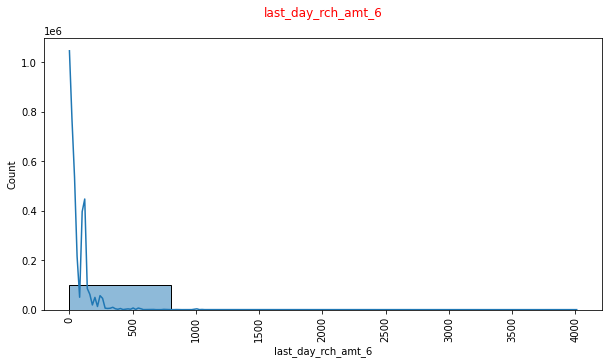

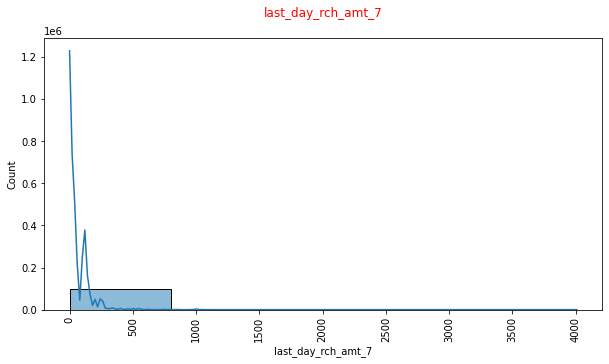

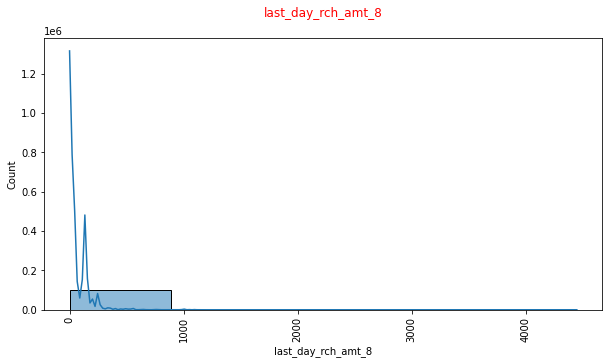

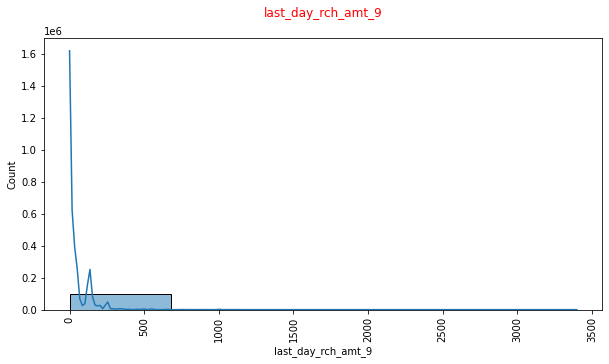

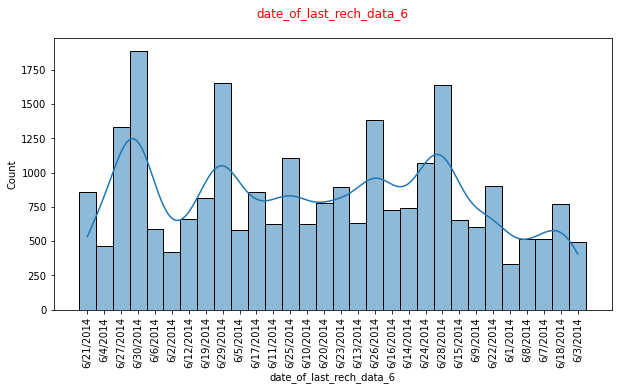

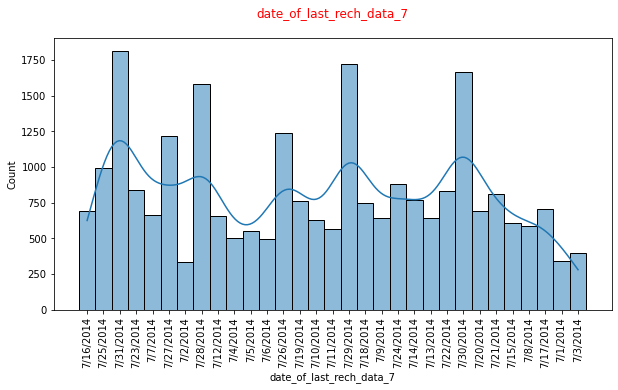

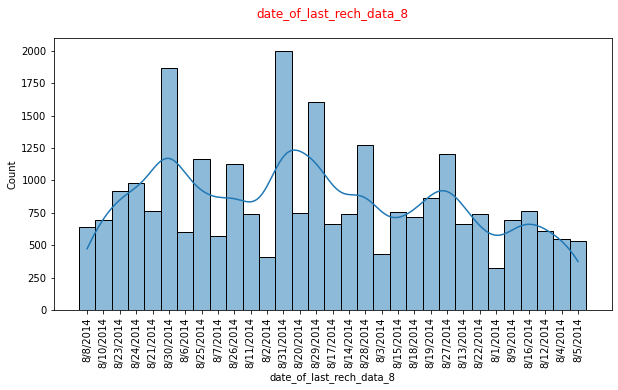

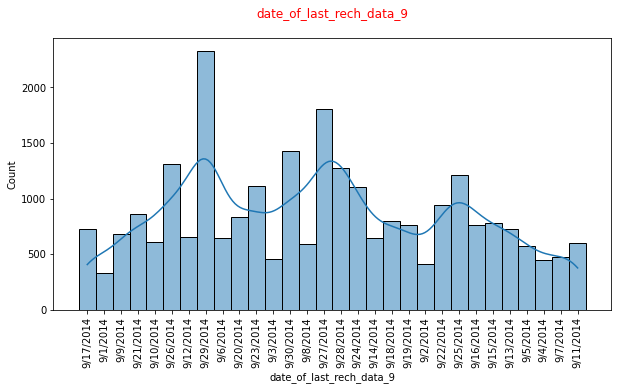

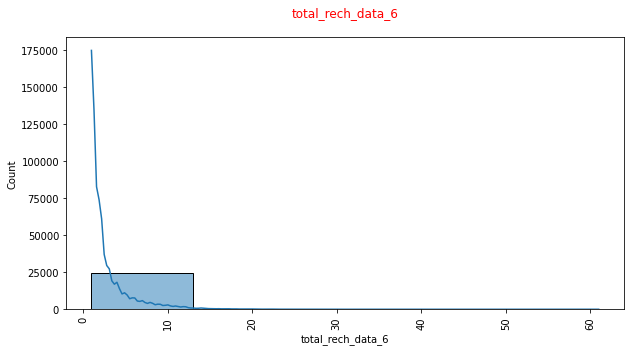

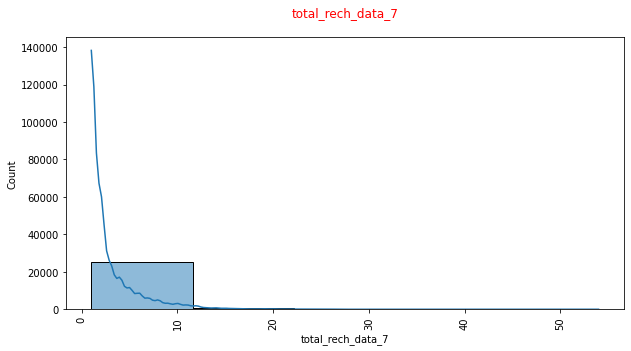

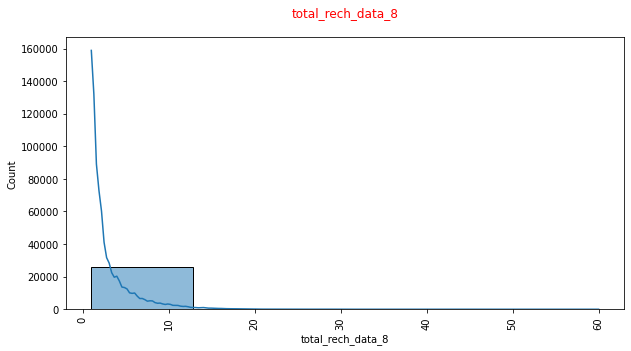

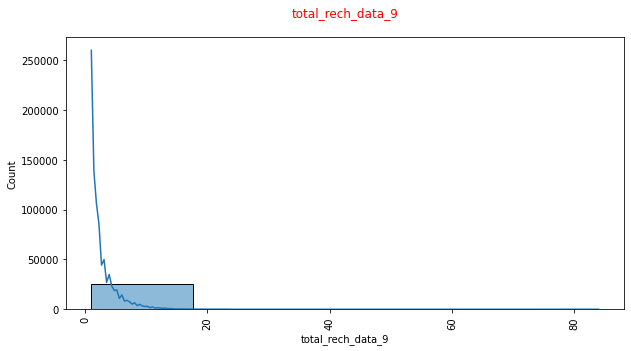

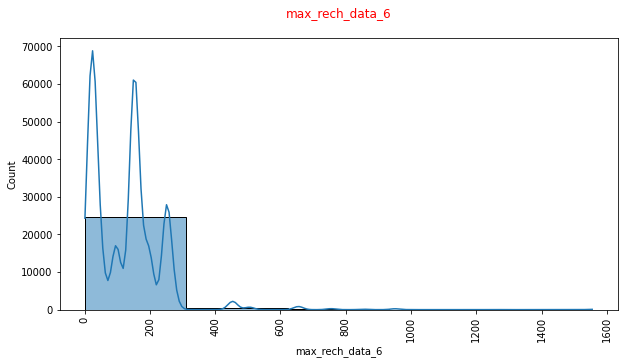

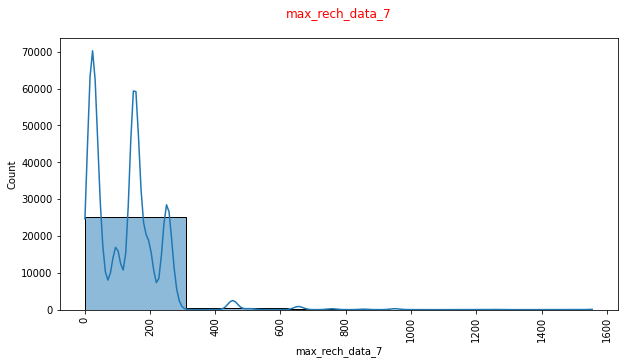

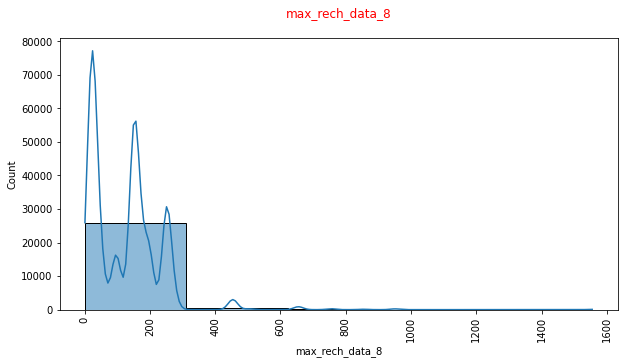

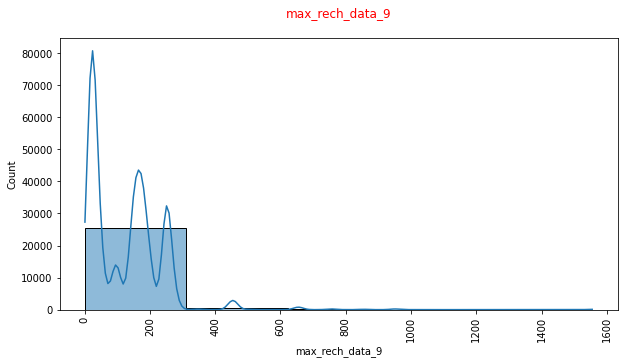

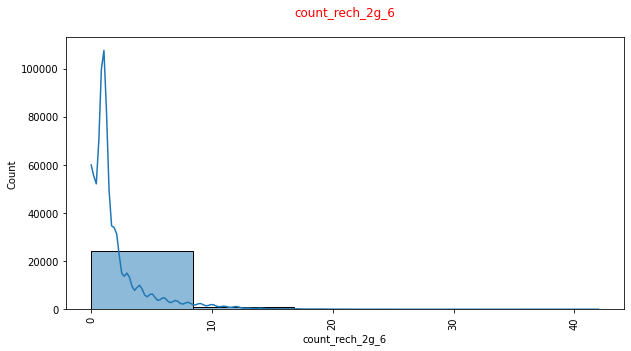

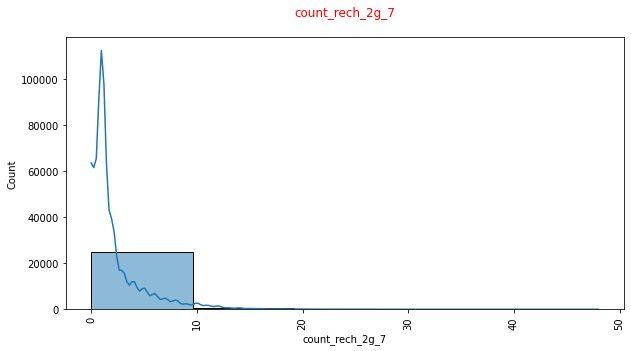

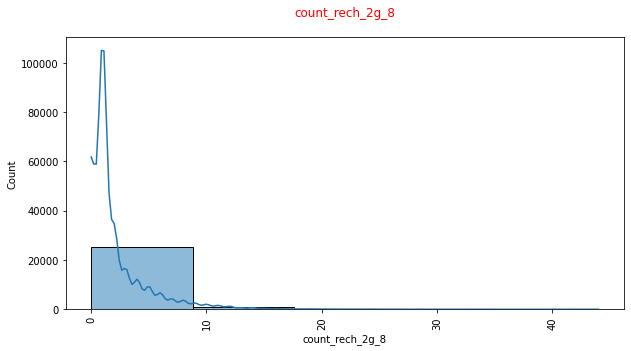

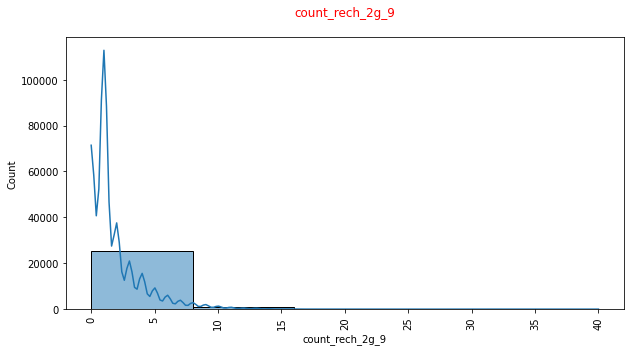

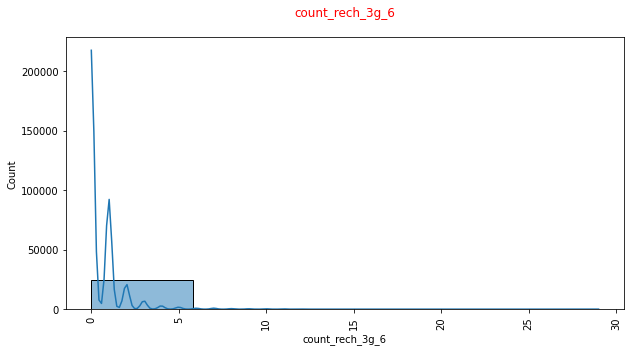

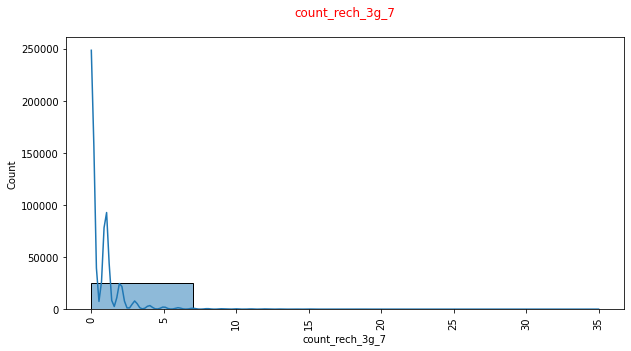

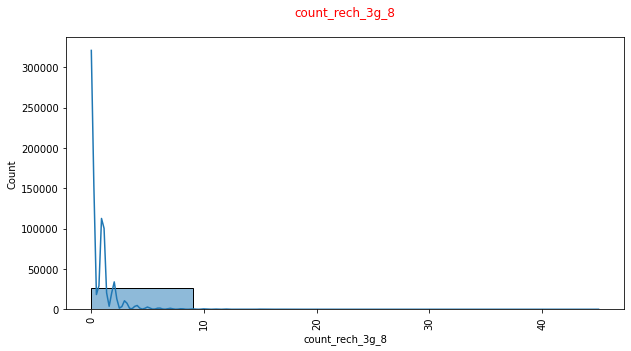

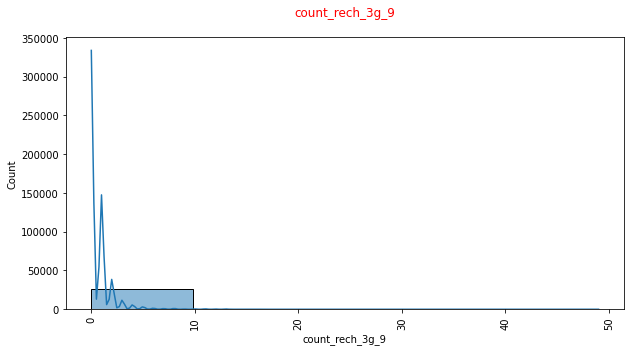

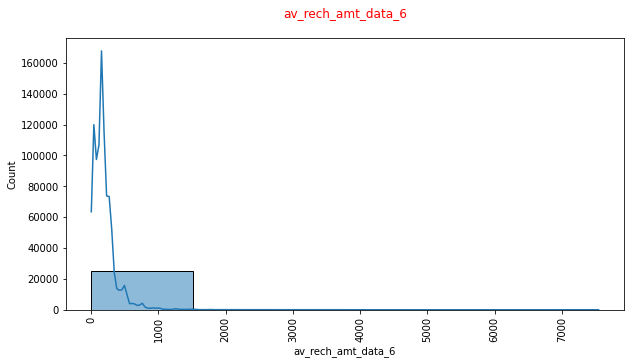

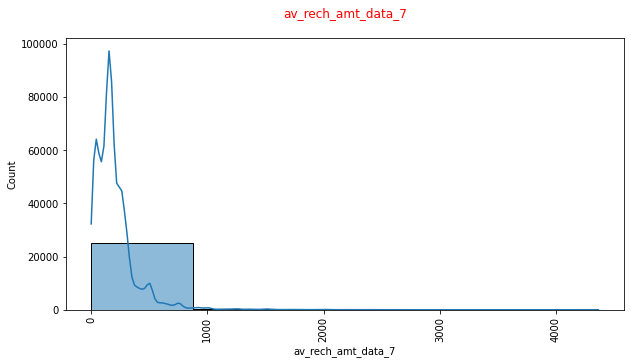

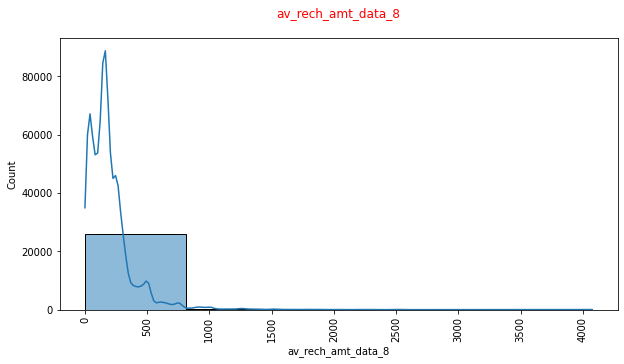

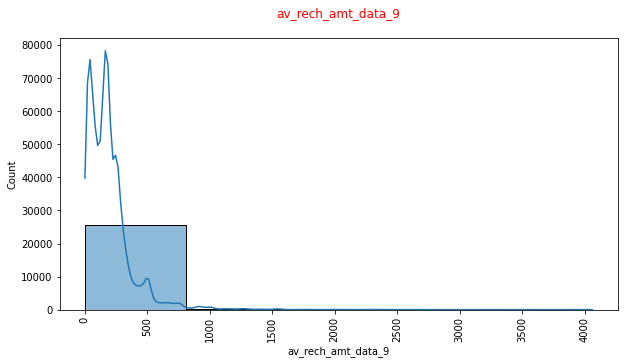

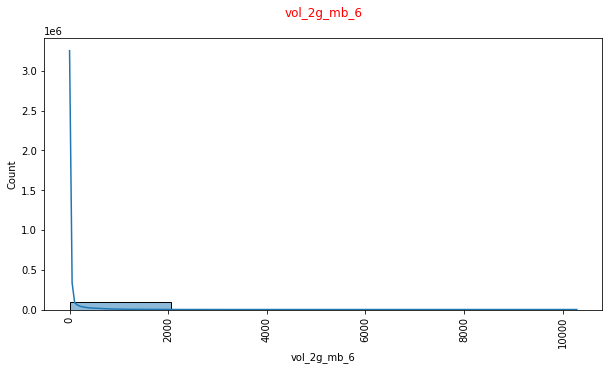

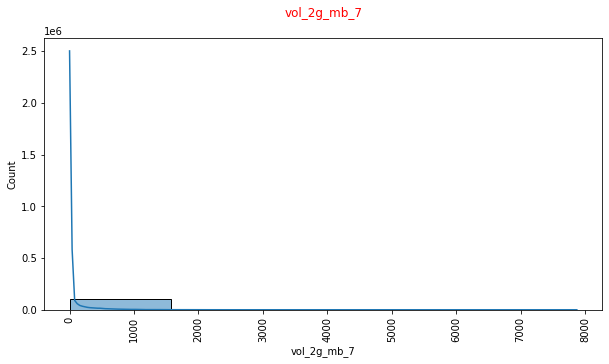

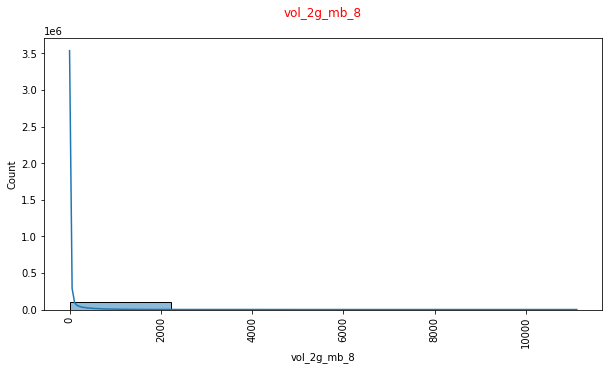

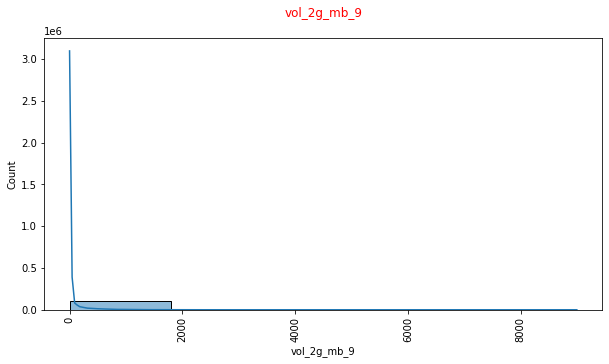

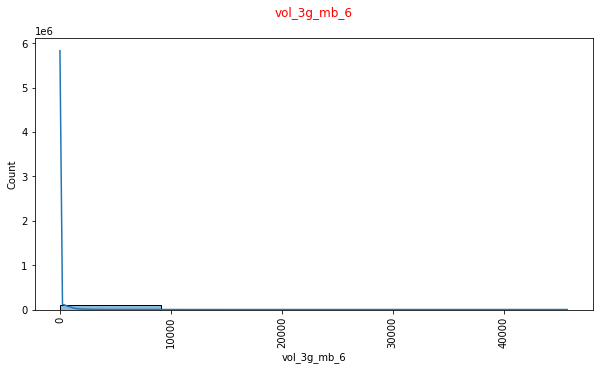

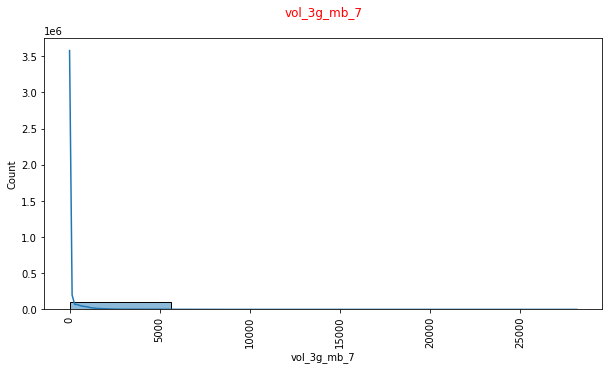

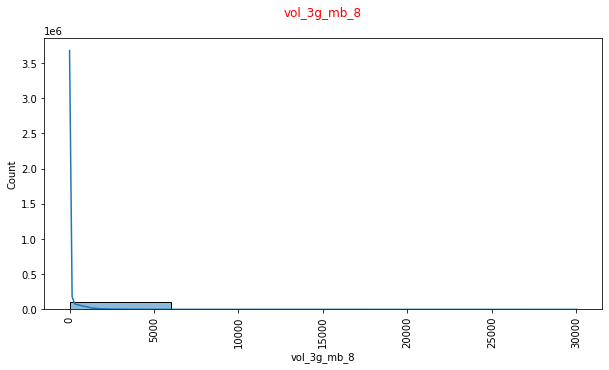

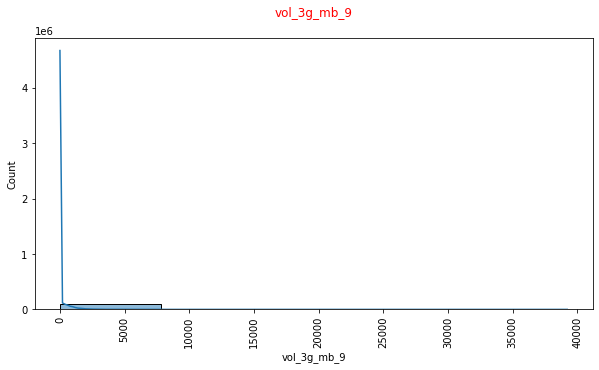

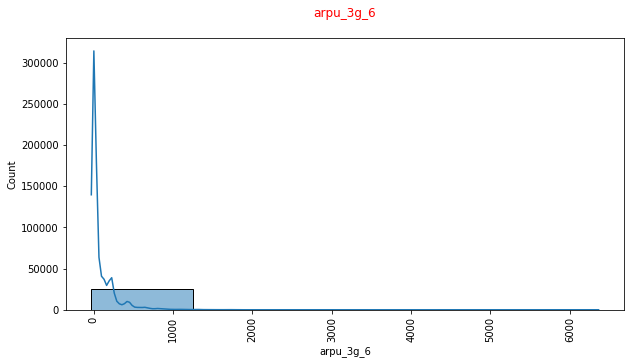

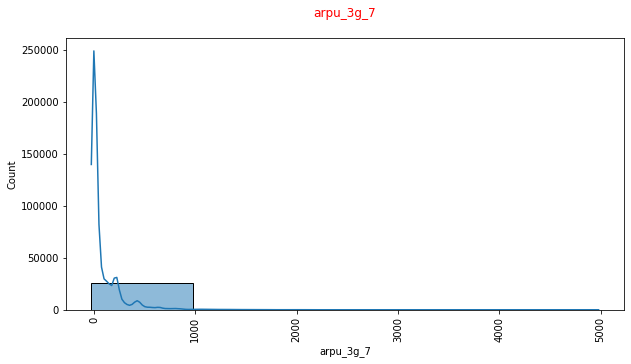

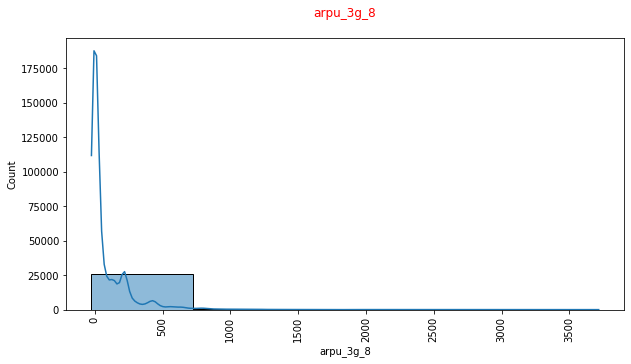

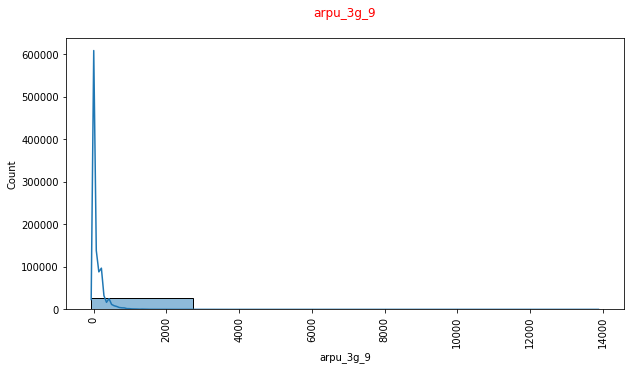

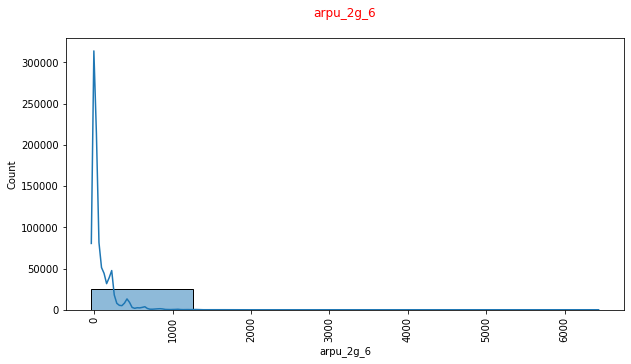

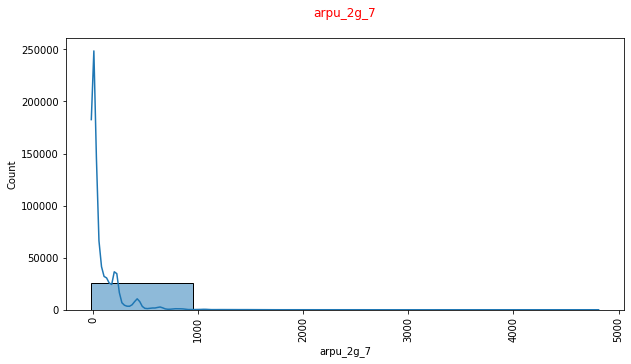

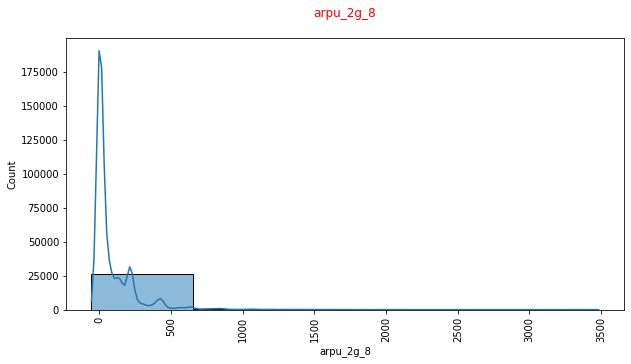

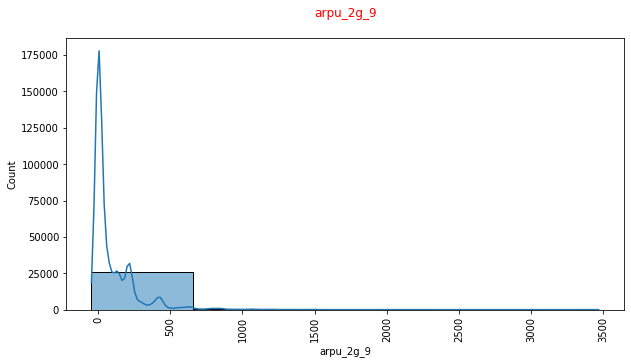

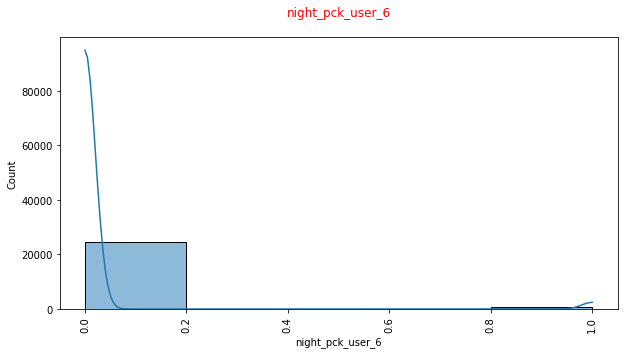

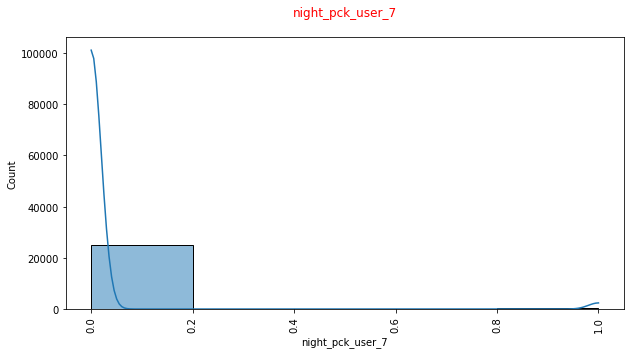

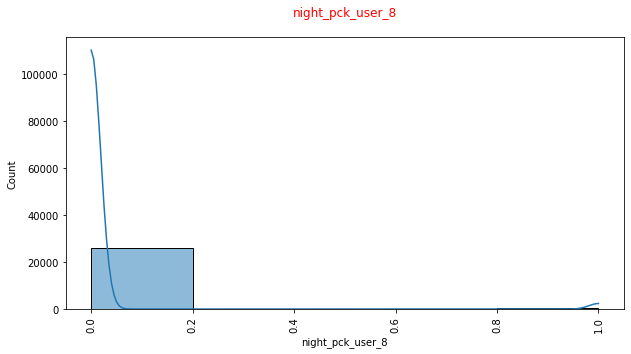

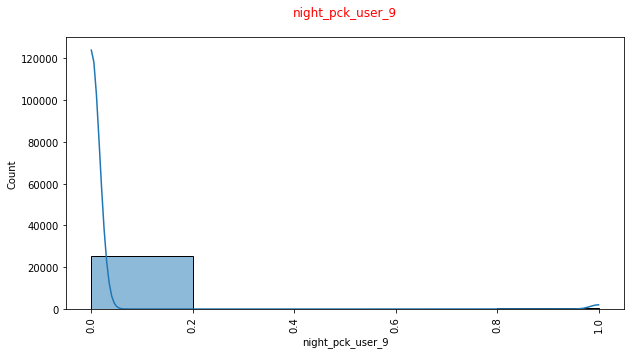

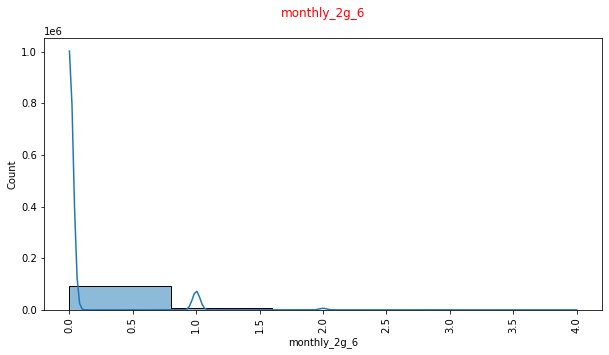

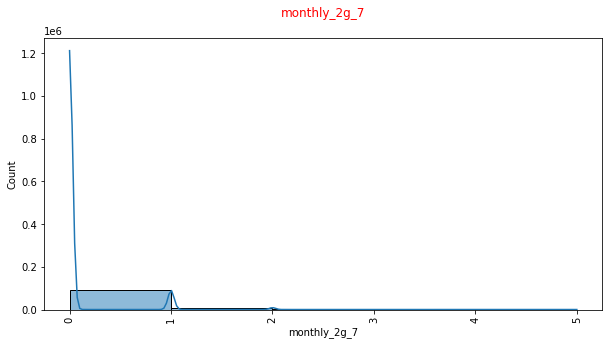

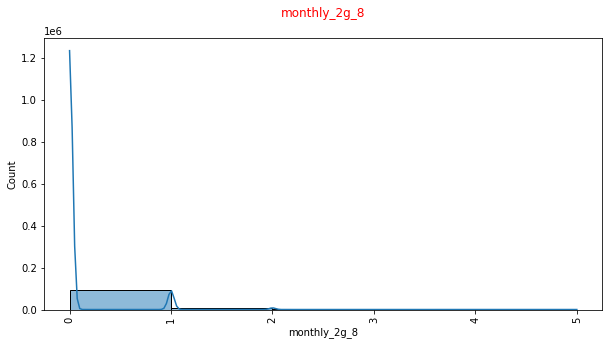

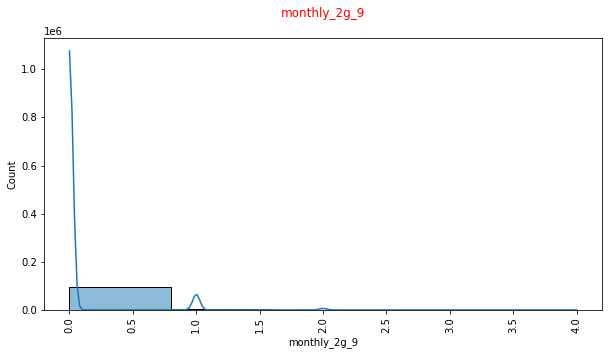

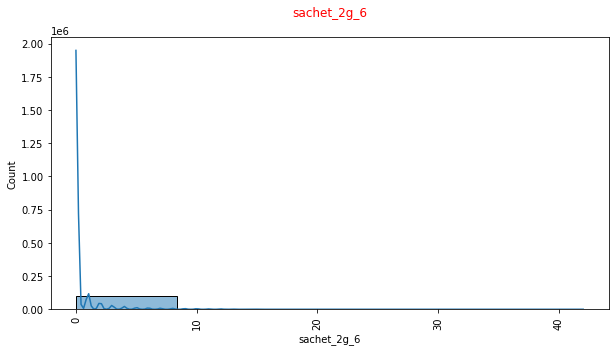

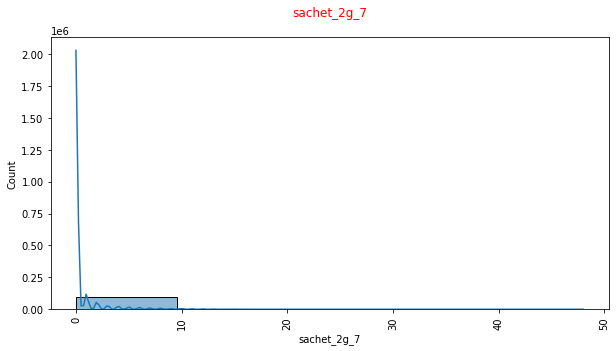

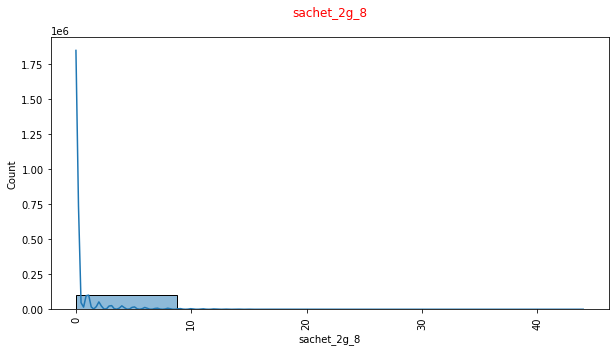

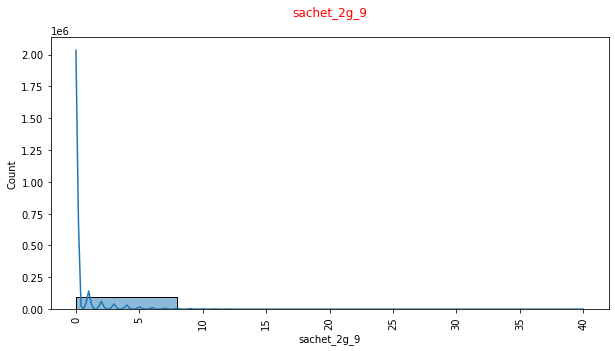

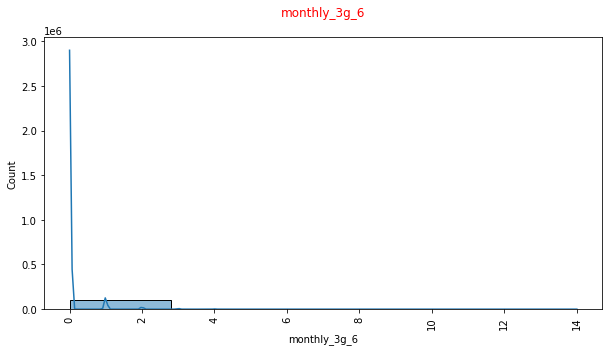

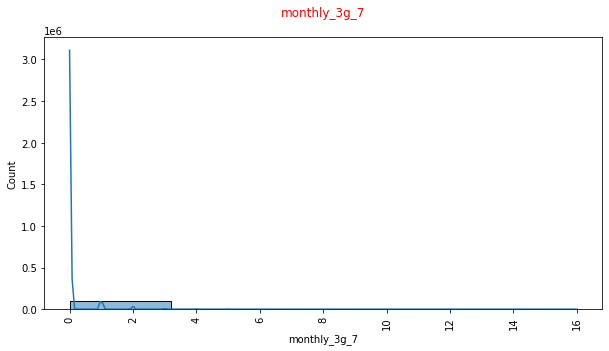

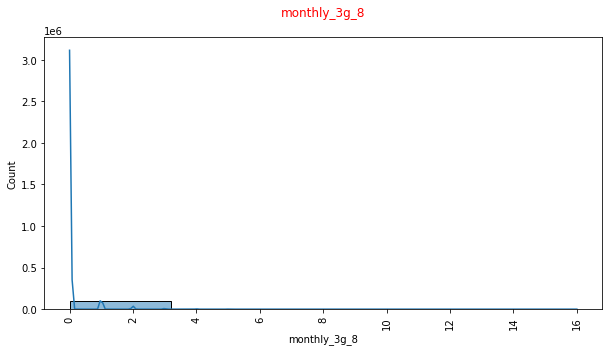

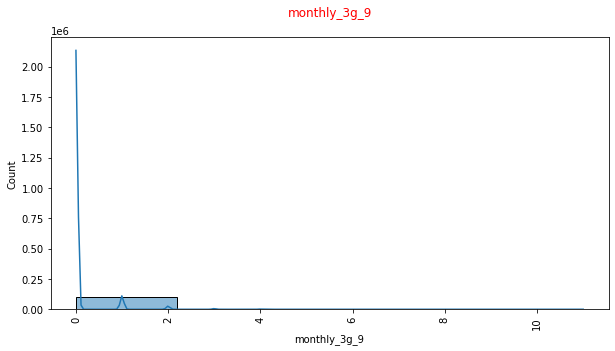

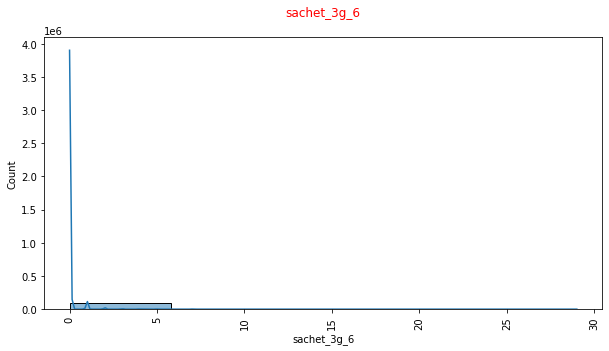

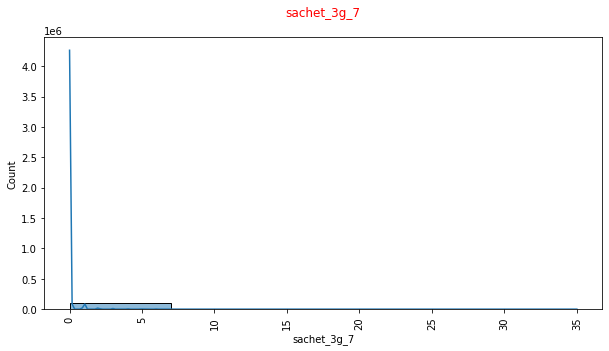

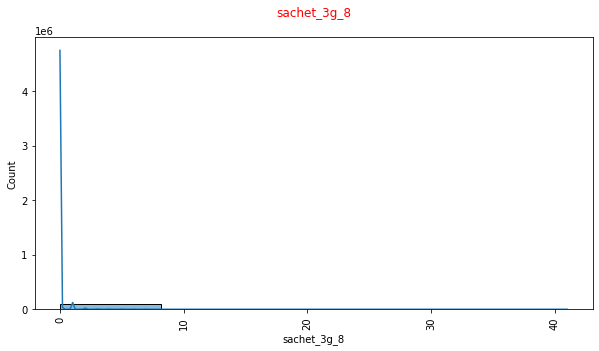

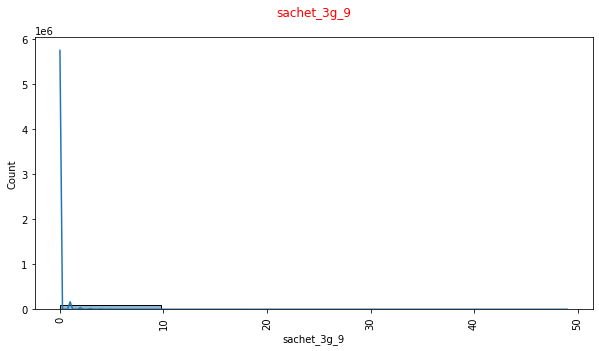

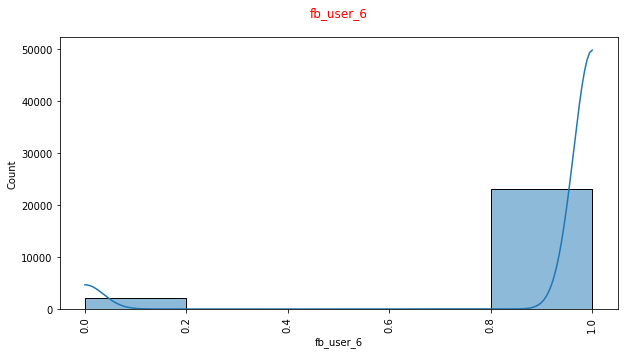

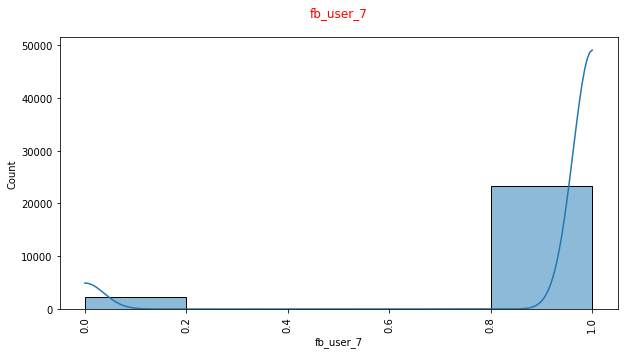

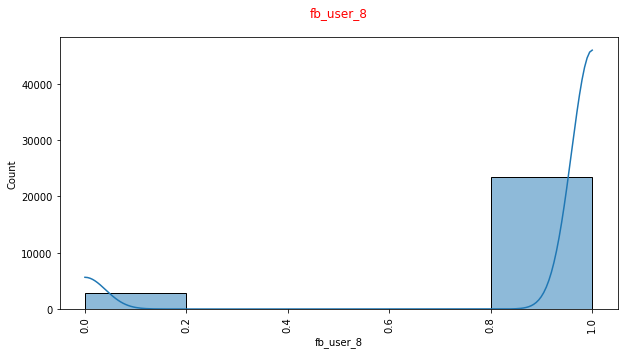

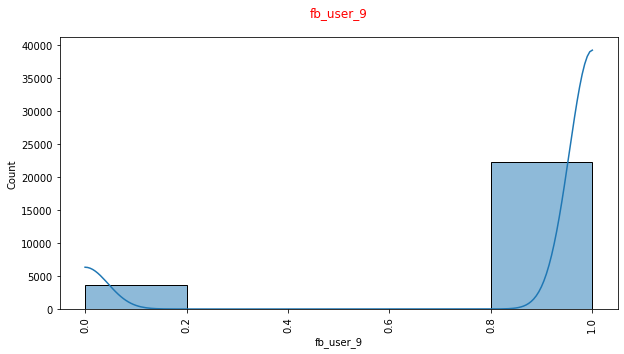

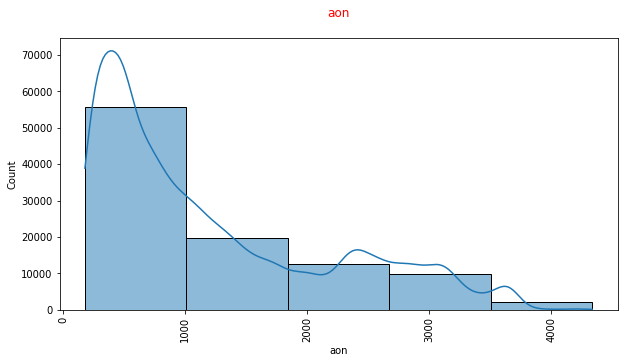

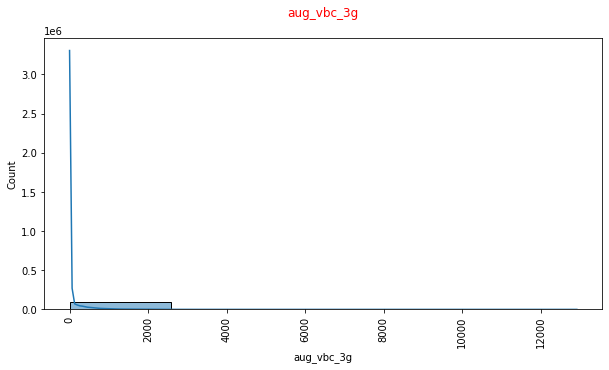

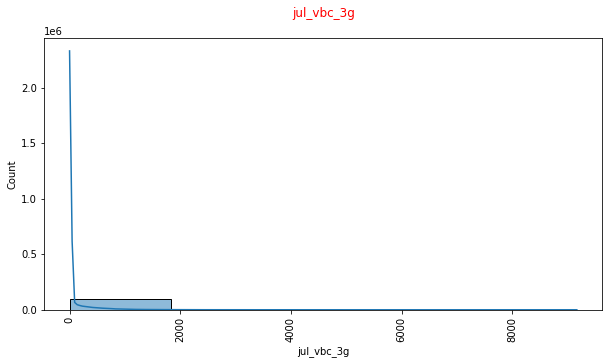

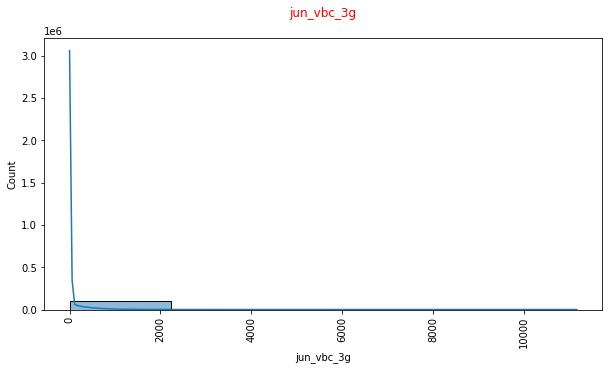

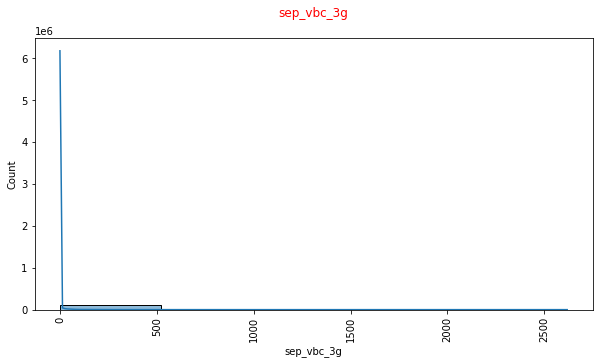

In [7]:
for col in df.columns:
    plt.figure(figsize=[10,5])
    sns.histplot(data=df, x=col,multiple="dodge",kde=True,bins=5)
    plt.title(f"{col}\n",color='red')
    plt.xticks(rotation=90)
    plt.show()
    print()

**Customers who churn are likely to show the following behavior:**

- The majority of customers belong to circle id 109.0

- Though there is no clear pattern here, the majority of churners had a tenure of less than 4 years.

- We can clearly see that MOU has dropped significantly for churners during the action period, i.e. the eighth month, reducing revenue generated from them.

- It's also worth noting that, despite the fact that the MOU is between 0 and 2000, the revenue is highest in that range. This indicates that these users had other services that were increasing their revenue.

- We can see that users who used a very small amount of VBC data but generated a lot of revenue churned.

- we can see that revenue is higher on the lower consumption side.

- Users who recharged in large amounts used the service for local purposes less than users who recharged in small amounts.

- During the good period, users with a higher maximum recharge amount but low incoming call minutes churned out more.


- The most important columns to predict churn are local incoming and outgoing calls for the eighth month and average revenue for the eighth month.

- Customers who have been with the company for less than four years are more likely to churn.

- The Max Recharge Amount is an excellent feature for predicting churn.

In [8]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

print(f"id_cols : {len(id_cols)}")
print(f"date_cols : {len(date_cols)}")
print(f"cat_cols : {len(cat_cols)}")
print(f"num_cols : {len(num_cols)}")

# validating the shape of the columns 
print(f"NO change in shape : {df.shape[1] == len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols)}")

id_cols : 2
date_cols : 12
cat_cols : 8
num_cols : 204
NO change in shape : True


### Null value analysis

In [9]:
import plotly.express as px
fig = px.bar(df.isna().mean())
fig.update_traces(marker_color='rgb(158,202,225)',texttemplate='%{text:.2s}', textposition='outside', text=df.isna().sum())
fig.update_layout(title_text='Null value analysis',title_x=0.5,uniformtext_minsize=8, uniformtext_mode='hide',
                 width=4000, height=500)
fig.update_layout({'plot_bgcolor': 'rgba(255,255,255,0)'})
fig.show()

### impute missing values

#### i) Imputing with zeroes

In [10]:
recharge_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df[recharge_columns].describe(include='all')

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170         1.864668         2.044699         2.016288   
std             2.516339         2.570254         2.768332         2.720132   
min             1.000000         0.000000         0.000000         0.000000   
25%             1.000000         1.000000         1.000000         1.000000   
50%             2.000000         1.000000         1.000000         1.000000   
75%             3.000000         2.000000         2.000000         2.000000   
max            84.000000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          1.781807         0.599133         0.621720         0.635711   
std           2.214701         1.274428         1.394524         1.422827   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           2.000000         1.000000         1.000000         1.000000   
max          40.000000        29.000000        35.000000        45.000000   

       count_rech_3g_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          0.659363       126.393392       126.729459       125.717301   
std           1.411513       108.477235       109.765267       109.437851   
min           0.000000         1.000000         1.000000         1.000000   
25%           0.000000        25.000000        25.000000        25.000000   
50%           0.000000       145.000000       145.000000       145.000000   
75%           1.000000       177.000000       177.000000       179.000000   
max          49.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.00000        25153.000000        25571.000000   
mean         124.94144          192.600982          200.981292   
std          111.36376          192.646318          196.791224   
min            1.00000            1.000000            0.500000   
25%           25.00000           82.000000           92.000000   
50%          145.00000          154.000000          154.000000   
75%          179.00000          252.000000          252.000000   
max         1555.00000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

some of the columns have the min value as zero 

In [11]:
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

total_rech_data_6 date_of_last_rech_data_6
1                 NaN                      NaN
2                 NaN                      NaN
3                 NaN                      NaN
5                 NaN                      NaN
6                 NaN                      NaN
7                 NaN                      NaN
8                 NaN                      NaN
9                 NaN                      NaN
10                NaN                      NaN
11                NaN                      NaN
12                NaN                      NaN
13                NaN                      NaN
14                NaN                      NaN
15                NaN                      NaN
16                NaN                      NaN
17                NaN                      NaN
18                NaN                      NaN
20                NaN                      NaN
21                NaN                      NaN
22                NaN                      NaN

It is also noted that the recharge date and value are both missing, implying that the customer did not recharge.

We can impute missing values with zeroes in the recharge variables where the minimum value is 1. This means that the customer did not recharge their number that month.

In [12]:
#list of recharge columns where missing values will be replaced with zeroes
impute_with_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
# fill in the blanks with 0
df[impute_with_zero] = df[impute_with_zero].apply(lambda x: x.fillna(0))

In [13]:
print("Missing value ratio:\n")
print(df[impute_with_zero].isnull().sum()*100/df.shape[1])

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [14]:
# dropping id and date columns
print("Shape before dropping: ", df.shape)
churn = df.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


#### ii) Replace NaN values in categorical variables

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [15]:
# replaceing the missing values with '-1' in the categorical columns
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

In [16]:
print("Missing value ratio:\n")
print(churn[cat_cols].isnull().sum()*100/churn.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


#### iii) Drop variables with more than a given threshold of missing values

In [17]:
initial_cols = churn.shape[1]

missing_thresh = 0.7

include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < missing_thresh else False))

drop_missing = pd.DataFrame({'features':churn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

features  include
0    loc_og_t2o_mou     True
1    std_og_t2o_mou     True
2    loc_ic_t2o_mou     True
3            arpu_6     True
4            arpu_7     True
..              ...      ...
207             aon     True
208      aug_vbc_3g     True
209      jul_vbc_3g     True
210      jun_vbc_3g     True
211      sep_vbc_3g     True

[196 rows x 2 columns]

In [18]:
# dropping columns
churn = churn.loc[:, include_cols]

droppend_columns = churn.shape[1] - initial_cols
print("{0} columns dropped.".format(droppend_columns))

-16 columns dropped.


#### iv) imputing using MICE

Multiple Imputation with Chained Equations is a reliable and informative method for dealing with missing data in datasets. Through an iterative series of predictive models, the procedure 'fills in' (imputes) missing data in a dataset. Each specified variable in the dataset is imputed using the other variables in the dataset in each iteration. These iterations should be repeated until convergence appears to have been achieved.

In [19]:
%%time

churn_cols = churn.columns

# Using the MICE technique to fill in missing values in the remaining columns
from fancyimpute import IterativeImputer as MICE

churn_imputed = MICE(verbose=1).fit_transform(churn)

[IterativeImputer] Completing matrix with shape (99999, 196)
[IterativeImputer] Change: 3757.2921531602624, scaled tolerance: 45.735400000000006 
[IterativeImputer] Change: 2014.6320886011704, scaled tolerance: 45.735400000000006 
[IterativeImputer] Change: 540.1884975808385, scaled tolerance: 45.735400000000006 
[IterativeImputer] Change: 231.75026166488547, scaled tolerance: 45.735400000000006 
[IterativeImputer] Change: 177.01944490085322, scaled tolerance: 45.735400000000006 
[IterativeImputer] Change: 189.7150009427733, scaled tolerance: 45.735400000000006 
[IterativeImputer] Change: 191.14926533343402, scaled tolerance: 45.735400000000006 
[IterativeImputer] Change: 185.74233048550371, scaled tolerance: 45.735400000000006 
[IterativeImputer] Change: 177.67972033180357, scaled tolerance: 45.735400000000006 
[IterativeImputer] Change: 168.700268246173, scaled tolerance: 45.735400000000006 
Wall time: 50min 29s


Importing an imputed numpy array into a pandas dataframe

In [20]:
churn = pd.DataFrame(churn_imputed, columns=churn_cols)
print(churn.isnull().sum()*100/churn.shape[0])

loc_og_t2o_mou    0.0
std_og_t2o_mou    0.0
loc_ic_t2o_mou    0.0
arpu_6            0.0
arpu_7            0.0
                 ... 
aon               0.0
aug_vbc_3g        0.0
jul_vbc_3g        0.0
jun_vbc_3g        0.0
sep_vbc_3g        0.0
Length: 196, dtype: float64


filtering the high-value customers


calculating total data recharge amount

In [21]:
# calculating the total data recharge amount for June and July --->
# number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

To get the total combined recharge amount for a month, add the total data recharge and total recharge.

In [22]:
# calculate total recharge amount for June and July --->
# call recharge amount + data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [23]:
# calculate average recharge done by customer in June and July
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [24]:
# looking at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [25]:
# Retain only customers who have recharged their phones with an amount greater than or equal to the 70th percentile.
filtered_churn = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
filtered_churn = filtered_churn.reset_index(drop=True)
filtered_churn.shape

(30001, 201)

In [26]:
# Remove variables that were created to filter high-value customers.
filtered_churn = filtered_churn.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
filtered_churn.shape

(30001, 196)

After removing the customers who provided a recharge value greater than or equal to the 70th percentile customer's recharge value, we are left with 30,001 rows.

### deriving churn

In [27]:
# calculate total incoming and outgoing minutes of usage
filtered_churn['total_calls_mou_9'] = filtered_churn.total_ic_mou_9 + filtered_churn.total_og_mou_9

In [28]:
# calculate 2g and 3g data consumption
filtered_churn['total_internet_mb_9'] =  filtered_churn.vol_2g_mb_9 + filtered_churn.vol_3g_mb_9

In [29]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
filtered_churn['churn'] = filtered_churn.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [30]:
# delete derived variables
filtered_churn = filtered_churn.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [31]:
# change data type to category
filtered_churn.churn = filtered_churn.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(filtered_churn.churn.value_counts()*100/filtered_churn.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


Calculate the difference between the eighth and previous months.


Let us generate some variables. In this case, the most significant feature may be the difference between the eighth and previous months. The difference can be seen in patterns such as usage or recharge value. Let us calculate the difference variable as the difference between the eighth month and the average of the sixth and seventh months.

In [32]:
filtered_churn['arpu_diff'] = filtered_churn.arpu_8 - ((filtered_churn.arpu_6 + filtered_churn.arpu_7)/2)

filtered_churn['onnet_mou_diff'] = filtered_churn.onnet_mou_8 - ((filtered_churn.onnet_mou_6 + filtered_churn.onnet_mou_7)/2)

filtered_churn['offnet_mou_diff'] = filtered_churn.offnet_mou_8 - ((filtered_churn.offnet_mou_6 + filtered_churn.offnet_mou_7)/2)

filtered_churn['roam_ic_mou_diff'] = filtered_churn.roam_ic_mou_8 - ((filtered_churn.roam_ic_mou_6 + filtered_churn.roam_ic_mou_7)/2)

filtered_churn['roam_og_mou_diff'] = filtered_churn.roam_og_mou_8 - ((filtered_churn.roam_og_mou_6 + filtered_churn.roam_og_mou_7)/2)

filtered_churn['loc_og_mou_diff'] = filtered_churn.loc_og_mou_8 - ((filtered_churn.loc_og_mou_6 + filtered_churn.loc_og_mou_7)/2)

filtered_churn['std_og_mou_diff'] = filtered_churn.std_og_mou_8 - ((filtered_churn.std_og_mou_6 + filtered_churn.std_og_mou_7)/2)

filtered_churn['isd_og_mou_diff'] = filtered_churn.isd_og_mou_8 - ((filtered_churn.isd_og_mou_6 + filtered_churn.isd_og_mou_7)/2)

filtered_churn['spl_og_mou_diff'] = filtered_churn.spl_og_mou_8 - ((filtered_churn.spl_og_mou_6 + filtered_churn.spl_og_mou_7)/2)

filtered_churn['total_og_mou_diff'] = filtered_churn.total_og_mou_8 - ((filtered_churn.total_og_mou_6 + filtered_churn.total_og_mou_7)/2)

filtered_churn['loc_ic_mou_diff'] = filtered_churn.loc_ic_mou_8 - ((filtered_churn.loc_ic_mou_6 + filtered_churn.loc_ic_mou_7)/2)

filtered_churn['std_ic_mou_diff'] = filtered_churn.std_ic_mou_8 - ((filtered_churn.std_ic_mou_6 + filtered_churn.std_ic_mou_7)/2)

filtered_churn['isd_ic_mou_diff'] = filtered_churn.isd_ic_mou_8 - ((filtered_churn.isd_ic_mou_6 + filtered_churn.isd_ic_mou_7)/2)

filtered_churn['spl_ic_mou_diff'] = filtered_churn.spl_ic_mou_8 - ((filtered_churn.spl_ic_mou_6 + filtered_churn.spl_ic_mou_7)/2)

filtered_churn['total_ic_mou_diff'] = filtered_churn.total_ic_mou_8 - ((filtered_churn.total_ic_mou_6 + filtered_churn.total_ic_mou_7)/2)

filtered_churn['total_rech_num_diff'] = filtered_churn.total_rech_num_8 - ((filtered_churn.total_rech_num_6 + filtered_churn.total_rech_num_7)/2)

filtered_churn['total_rech_amt_diff'] = filtered_churn.total_rech_amt_8 - ((filtered_churn.total_rech_amt_6 + filtered_churn.total_rech_amt_7)/2)

filtered_churn['max_rech_amt_diff'] = filtered_churn.max_rech_amt_8 - ((filtered_churn.max_rech_amt_6 + filtered_churn.max_rech_amt_7)/2)

filtered_churn['total_rech_data_diff'] = filtered_churn.total_rech_data_8 - ((filtered_churn.total_rech_data_6 + filtered_churn.total_rech_data_7)/2)

filtered_churn['max_rech_data_diff'] = filtered_churn.max_rech_data_8 - ((filtered_churn.max_rech_data_6 + filtered_churn.max_rech_data_7)/2)

filtered_churn['av_rech_amt_data_diff'] = filtered_churn.av_rech_amt_data_8 - ((filtered_churn.av_rech_amt_data_6 + filtered_churn.av_rech_amt_data_7)/2)

filtered_churn['vol_2g_mb_diff'] = filtered_churn.vol_2g_mb_8 - ((filtered_churn.vol_2g_mb_6 + filtered_churn.vol_2g_mb_7)/2)

filtered_churn['vol_3g_mb_diff'] = filtered_churn.vol_3g_mb_8 - ((filtered_churn.vol_3g_mb_6 + filtered_churn.vol_3g_mb_7)/2)

In [33]:
# let's look at summary of one of the difference variables
filtered_churn['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

Remove columns related to the churn month (9th month)

In [34]:
# Remove all variables related to the ninth month.
filtered_churn = filtered_churn.filter(regex='[^9]$', axis=1)
filtered_churn.shape

(30001, 173)

In [35]:
# collect all names that end in 9
col_9_names = churn.filter(regex='9$', axis=1).columns

# relabel the columns num cols and cat cols
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in filtered_churn.columns if col not in cat_cols]

### visualise data

In [36]:
# change columns types
filtered_churn[num_cols] = filtered_churn[num_cols].apply(pd.to_numeric)
filtered_churn[cat_cols] = filtered_churn[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [37]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

#### Univariate EDA

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


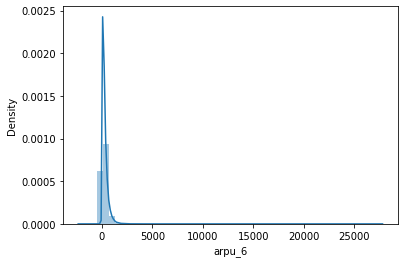

In [38]:
univariate(churn.arpu_6)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


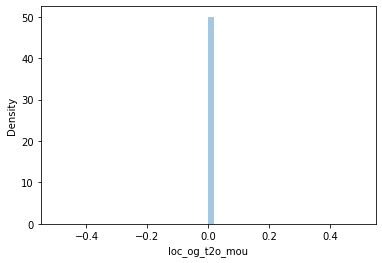

In [39]:
univariate(churn.loc_og_t2o_mou)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


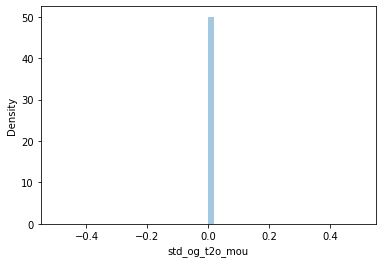

In [40]:
univariate(churn.std_og_t2o_mou)

count    99999.000000
mean       121.504718
std        304.392960
min       -680.595983
25%          4.090000
50%         28.040000
75%        106.760000
max      10752.560000
Name: onnet_mou_8, dtype: float64


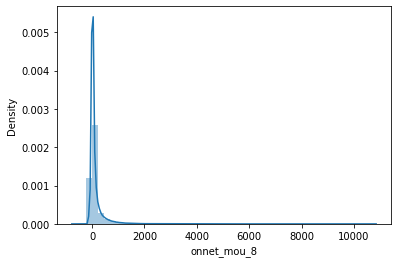

In [41]:
univariate(churn.onnet_mou_8)

count    99999.000000
mean       184.524769
std        307.438181
min        -35.415866
25%         31.230000
50%        101.110000
75%        202.870000
max      10310.760000
Name: offnet_mou_9, dtype: float64


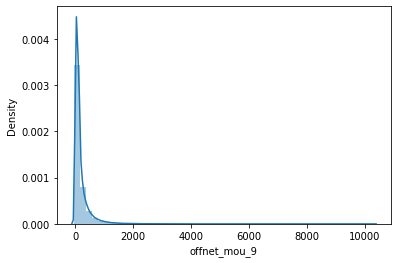

In [42]:
univariate(churn.offnet_mou_9)


#### Bivariate EDA

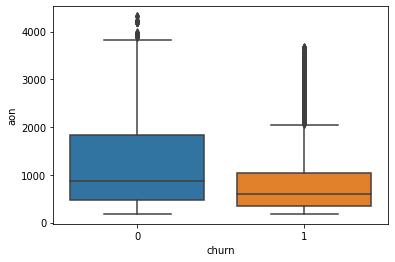

In [43]:
bivariate(filtered_churn.churn, filtered_churn.aon)


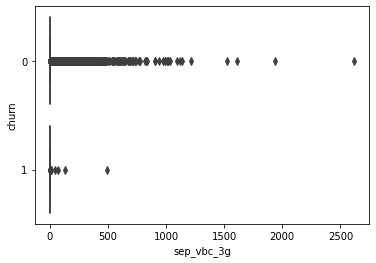

In [44]:
bivariate(filtered_churn.sep_vbc_3g, filtered_churn.churn)

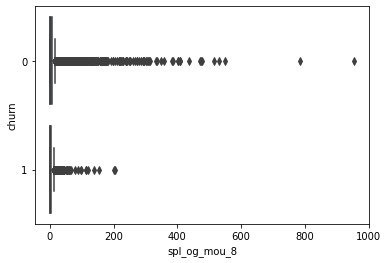

In [45]:
bivariate(filtered_churn.spl_og_mou_8, filtered_churn.churn)


In [46]:
pd.crosstab(filtered_churn.churn, filtered_churn.night_pck_user_8, normalize='columns')*100


night_pck_user_8      -1.0        0.0        1.0
churn                                           
0                 85.89123  97.117602  97.360704
1                 14.10877   2.882398   2.639296

In [47]:
pd.crosstab(filtered_churn.churn, filtered_churn.sachet_3g_8)


sachet_3g_8   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   \
churn                                                                      
0            24972  1609   399   184   106    86    43    35    28    19   
1             2369    48     5     8     4     2     1     0     2     0   

sachet_3g_8  10.0  11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  \
churn                                                                           
0              15     8    11    10     6     6     2     2     3     1     3   
1               0     0     0     1     0     0     1     0     0     0     0   

sachet_3g_8  21.0  23.0  25.0  27.0  29.0  30.0  38.0  41.0  
churn                                                        
0               3     2     1     1     1     2     1     1  
1               0     0     0     0     0     0     0     0

Cap outliers in all numeric variables with k-sigma technique


In [48]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [49]:
# capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [50]:
# limit outliers in numerical columns
filtered_churn[num_cols] = filtered_churn[num_cols].apply(cap_outliers, axis=0)

### Modelling

#### i) Making predictions

In [51]:
filtered_churn

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0                 0.0             0.0             0.0   197.385   214.816   
1                 0.0             0.0             0.0  1069.180  1349.850   
2                 0.0             0.0             0.0   378.721   492.223   
3                 0.0             0.0             0.0   514.453   597.753   
4                 0.0             0.0             0.0    74.350   193.897   
...               ...             ...             ...       ...       ...   
29996             0.0             0.0             0.0   384.316   255.405   
29997             0.0             0.0             0.0   328.594   202.966   
29998             0.0             0.0             0.0   644.973   455.228   
29999             0.0             0.0             0.0   312.558   512.932   
30000             0.0             0.0             0.0   322.991   303.386   

            arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0       213.803000   -94.988503   -82.262734         0.00    143.913243   
1      2014.483901    57.840000    54.680000        52.29    453.430000   
2       137.362000   413.690000   351.030000        35.08     94.660000   
3       637.760000   102.410000   132.110000        85.14    757.930000   
4       366.966000    48.960000    50.660000        33.58     85.410000   
...            ...          ...          ...          ...           ...   
29996   393.474000    78.680000    29.040000       103.24     56.130000   
29997   118.707000   423.990000   181.830000         5.71     39.510000   
29998   564.334000   806.730000   549.360000       775.41    784.760000   
29999   402.080000   199.890000   174.460000         2.46    175.880000   
30000   606.817000     0.000000     0.000000         0.00      0.000000   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0        133.507276          0.00       28.59234      12.001523   
1        567.160000        325.91       16.23000      33.490000   
2         80.630000        136.48        0.00000       0.000000   
3        896.680000        983.39        0.00000       0.000000   
4         89.360000        205.89        0.00000       0.000000   
...             ...           ...            ...            ...   
29996     28.090000         61.44        0.00000       0.000000   
29997     39.810000         18.26        0.00000       0.000000   
29998    617.130000        595.44        0.00000       0.000000   
29999    277.010000        248.33        0.00000       0.000000   
30000      0.000000          0.00        0.00000       0.000000   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0               0.00      33.260173      12.320932           0.00   
1              31.64      23.740000      12.590000          38.06   
2               0.00       0.000000       0.000000           0.00   
3               0.00       0.000000       0.000000           0.00   
4               0.00       0.000000       0.000000           0.00   
...              ...            ...            ...            ...   
29996           0.00       0.000000       0.000000           0.00   
29997           0.00       0.000000       0.000000           0.00   
29998           0.00       0.000000       0.000000           0.00   
29999           0.00       0.000000       0.000000           0.00   
30000           0.00       0.000000       0.000000           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0            -99.918632        -117.34919              0.00         93.338314   
1             51.390000          31.38000             40.28        308.630000   
2            297.130000         217.59000             12.49         80.960000   
3              4.480000           6.16000             23.34         91.810000   
4             48.960000          50.66000             33.58         82.940000   
...                 ...               ...               ...  

In [52]:
# import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#### Preprocessing data


In [53]:
# change churn to numeric
filtered_churn['churn'] = pd.to_numeric(filtered_churn['churn'])

####  Train Test split

In [54]:
# divide data into train and test
X = filtered_churn.drop("churn", axis = 1)
y = filtered_churn.churn
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [55]:
# print shapes of train and test sets
x_train.shape,y_train.shape,x_test.shape,y_test.shape,

((22500, 172), (22500,), (7501, 172), (7501,))

#### Aggregating the categorical columns

In [56]:
train = pd.concat([x_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

fb_user_8
-1.0    0.141108
0.0     0.066887
1.0     0.024463
Name: churn, dtype: float64

In [57]:
# In each categorical column, replace categories with aggregated values.
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
x_train.replace(mapping, inplace = True)
x_test.replace(mapping, inplace = True)

In [58]:
# Check the data type of categorical columns to ensure that they are numeric.
x_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 4525 to 22754
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  22500 non-null  float64
 1   night_pck_user_7  22500 non-null  float64
 2   night_pck_user_8  22500 non-null  float64
 3   fb_user_6         22500 non-null  float64
 4   fb_user_7         22500 non-null  float64
 5   fb_user_8         22500 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB


#### PCA

**PCA**

Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed. The underlying data can be measurements describing properties of production samples, chemical compounds or reactions, process time points of a continuous process, batches from a batch process, biological individuals or trials of a DOE-protocol,

In [59]:
# using pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [60]:
pca.fit(x_train)
churn_pca = pca.fit_transform(x_train)

In [61]:
# pipeline pca model extraction
pca = pca.named_steps['pca']

# Examine the explained variation of PCA components.
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.60
1       21.01
2       26.91
3       31.93
4       36.03
        ...  
167    100.00
168    100.00
169    100.00
170    100.00
171    100.00
Length: 172, dtype: float64


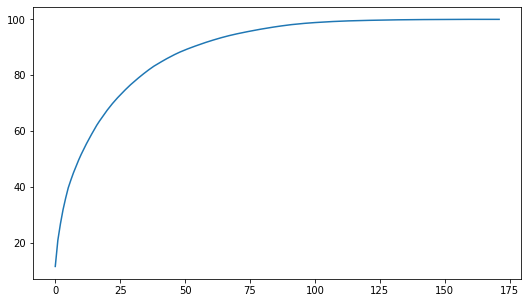

In [62]:
# display feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
# The y-axis has 100 elements, the x-axis has 175 elements, and the normalising factor is 20.
plt.figure(figsize=(175/20,100/20)) 
plt.plot(cumulative_variance)

#### PCA and Logistic Regression


In [63]:
# making a pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [64]:
# fitting the model
pipeline.fit(x_train, y_train)

# checking score on train data
pipeline.score(x_train, y_train)

0.8441777777777778

####  Evaluate on test data

In [65]:
# predicting churn value on the test data
y_pred = pipeline.predict(x_test)

# createing  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# checking the sensi and speci
sensi, speci, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("sensi: \t", round(sensi, 2), "\n", "speci: \t", round(speci, 2), sep='')

# checking area under curve
y_pred_prob = pipeline.predict_proba(x_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5811 1080]
 [  97  513]]
sensi: 	0.84
speci: 	0.84
AUC:    	 0.92


#### Hyperparameter tuning - PCA and Logistic Regression

In [66]:
# there is a class imbalance
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churn, dtype: float64

In [67]:
# using PCA
pca = PCA()

# The class weight is used to handle class imbalance in logistic regression, and it adjusts the cost function.
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# creating pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compiling pipeline
pca_logistic = Pipeline(steps)

# hyperparameter spacing
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# taking 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# creating gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [68]:
# fit model
model.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [69]:
# cross validation results
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.696005      0.040661         0.000000        0.000000   
1        2.206804      0.031276         0.000000        0.000000   
2        2.319198      0.116985         0.070602        0.017136   
3        2.994404      0.068995         0.071996        0.012022   
4        1.866400      0.071961         0.000000        0.000000   
5        2.215204      0.032669         0.000000        0.000000   
6        2.415001      0.064391         0.067200        0.009807   
7        3.169400      0.083997         0.086198        0.025524   
8        1.985197      0.081848         0.000000        0.000000   
9        2.252798      0.063712         0.000000        0.000000   
10       2.499601      0.124047         0.068801        0.009829   
11       3.135399      0.080717         0.077999        0.012082   
12       1.806599      0.055342         0.000000        0.000000   
13       2.235801      0.130357         0.000000        0.000000   
14       2.552001      0.115198         0.064996        0.005691   
15       3.254602      0.098361         0.072001        0.006480   
16       1.769601      0.036615         0.000000        0.000000   
17       2.243797      0.014089         0.000000        0.000000   
18       2.435203      0.052642         0.062997        0.002365   
19       3.169948      0.111987         0.073201        0.011684   
20       1.808803      0.024765         0.000000        0.000000   
21       2.217203      0.033760         0.000000        0.000000   
22       2.603594      0.102224         0.081801        0.013333   
23       3.399795      0.176152         0.075004        0.011119   
24       1.890804      0.119984         0.000000        0.000000   
25       2.326608      0.066447         0.000000        0.000000   
26       2.505998      0.085107         0.058799        0.002480   
27       3.196195      0.134686         0.064000        0.003094   
28       1.665796      0.121467         0.000000        0.000000   
29       2.246002      0.155326         0.000000        0.000000   
30       2.182402      0.013539         0.052200        0.004113   
31       2.109002      0.199951         0.022608        0.003608   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0                0.1                      l1                      60   
1                0.1                      l1                      80   
2                0.1                      l2                      60   
3                0.1                      l2                      80   
4                0.5                      l1                      60   
5                0.5                      l1                      80   
6                0.5                      l2                      60   
7                0.5                      l2                      80   
8                  1                      l1                      60   
9                  1                      l1                      80   
10                 1                      l2                      60   
11                 1                      l2                      80   
12                 2                      l1                      60   
13                 2                      l1                      80   
14                 2                      l2                      60   
15                 2                      l2                      80   
16                 3                      l1                      60   
17                 3                      l1                      80   
18                 3                      l2                      60   
19                 3                      l2                      80   
20                 4                      l1                      60   
21                 4                      l1                      80   
22                 4                      l2                      60   
23                 4           

In [70]:
# printing the best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9023842197294509
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [71]:
# predicting churn on test data
y_pred = model.predict(x_test)

# creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensi and speci
sensi, speci, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("sensi: \t", round(sensi, 2), "\n", "speci: \t", round(speci, 2), sep='')

# checking the area under the curve
y_pred_prob = model.predict_proba(x_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6001  890]
 [ 119  491]]
sensi: 	0.8
speci: 	0.87
AUC:    	 0.92


####  Random Forest


In [72]:
# random forest - the class weight is used to deal with class imbalance by adjusting the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter spacification
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# creating 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# creating gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [73]:
# fitting the model
model.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [74]:
# printig the best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9278717297722933
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [75]:
# predicting the churn on test data
y_pred = model.predict(x_test)

# creating the onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# checking sensi and speci
sensi, speci, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("sensi: \t", round(sensi, 2), "\n", "speci: \t", round(speci, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(x_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6791  100]
 [ 307  303]]
sensi: 	0.5
speci: 	0.99
AUC:    	 0.94


####  Choosing best features

In [76]:
# Using train data to run a random forest model
max_features = int(round(np.sqrt(x_train.shape[1])))  
print(max_features)

model_rf = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [77]:
# fitting model
model_rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.9s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [78]:
# OOB score
model_rf.oob_score_

0.9450222222222222

In [79]:
# predicting thr churn on test data
y_pred = model_rf.predict(x_test)

# creating  confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# checking sensi and speci
sensi, speci, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("sensi: \t", round(sensi, 2), "\n", "speci: \t", round(speci, 2), sep='')

# checking area under curve
y_pred_prob = model_rf.predict_proba(x_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[6802   89]
 [ 329  281]]
sensi: 	0.46
speci: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


#### Feature Importance


In [80]:
# predictors
features = filtered_churn.drop('churn', axis=1).columns

# feature_importance
importance = model_rf.feature_importances_

# creating dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sorting features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


variables  importance_percentage
0      total_ic_mou_8               5.720568
1       roam_og_mou_8               4.167121
2        loc_ic_mou_8               3.840031
3        loc_og_mou_8               3.301431
4      total_og_mou_8               2.957974
..                ...                    ...
167  std_ic_t2o_mou_7               0.000000
168  std_ic_t2o_mou_8               0.000000
169    std_og_t2o_mou               0.000000
170    loc_ic_t2o_mou               0.000000
171    loc_og_t2o_mou               0.000000

[172 rows x 2 columns]

#### Extracting top 30 features


In [81]:
# extracting top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

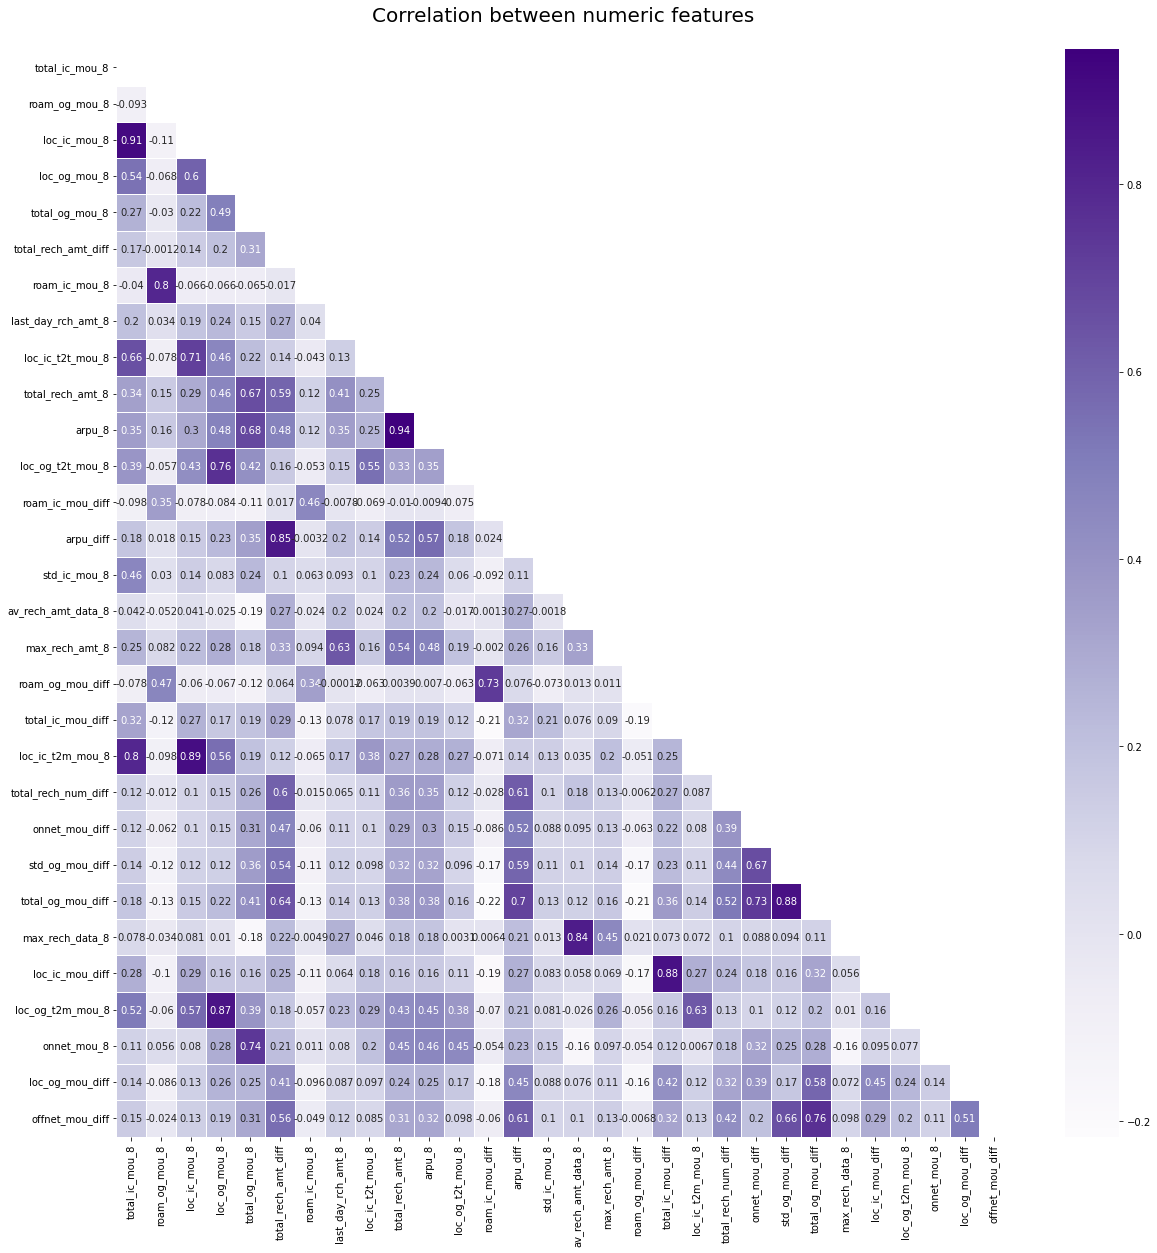

In [82]:
import seaborn as sns
# feature correlation graph
plt.figure(figsize=[20,20])
matrix = np.triu(x_train[top_features].corr())
sns.heatmap(x_train[top_features].corr(),linewidths=.5,cmap="Purples",annot=True,mask=matrix)
plt.title("Correlation between numeric features\n",size=20)
plt.show()

In [83]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
x_train = x_train[top_features]
x_test = x_test[top_features]

In [84]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compiling pipeline
logistic = Pipeline(steps)

# hyperparameter spacification
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# creating 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# creating gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [85]:
# fitting the model
model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [86]:
# printing the best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8818896240581602
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [87]:
# predicting churn on test data
y_pred = model.predict(x_test)

# creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# checking sensi and speci
sensi, speci, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("sensi: \t", round(sensi, 2), "\n", "speci: \t", round(speci, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(x_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5840 1051]
 [ 126  484]]
sensi: 	0.79
speci: 	0.85
ROC:    	 0.88


The logistic model's intercept and coefficients should be extracted.

In [88]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [89]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [90]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(x_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [91]:
# concatenating the dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

intercept  total_ic_mou_8  total_rech_amt_diff  total_og_mou_8    arpu_8  \
0  -1.542229       -0.734048            -0.699482       -2.062462  0.173963   

   roam_ic_mou_8  roam_og_mou_8  std_ic_mou_8  av_rech_amt_data_8  \
0      -0.025184       0.382271     -0.039924           -0.748601   

   std_og_mou_8  
0      1.527401

**Insights into Business**

- Telecom companies must pay close attention to roaming rates. They must provide attractive offers to customers who use services from roaming zones. The company should concentrate on the STD and ISD rates. Perhaps the rates are excessively high. Give them some sort of STD and ISD package.
- To address both of the aforementioned issues, it is preferred that the telecom company collect customer query and complaint data and tailor their services to the needs of their customers.

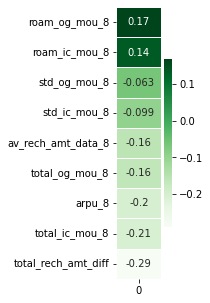

In [92]:
#finding the correlation with respect to the target variable 
plt.figure(figsize=[1,5])
sns.heatmap(pd.DataFrame(x_train.corrwith(y_train).sort_values(ascending=False)),
            linewidths=.5,cmap="Greens",annot=True)
plt.show()

In [93]:
#this are the top positively correlated features   
pd.DataFrame(x_train.corrwith(y_train).sort_values(ascending=False),columns=["Features"]).head(2)

Features
roam_og_mou_8  0.168259
roam_ic_mou_8  0.137121

In [98]:
pd.DataFrame(x_train.corrwith(y_train).sort_values(ascending=False),columns=["Features"]).tail(3)

Features
arpu_8              -0.204207
total_ic_mou_8      -0.205599
total_rech_amt_diff -0.289331

**What Is an Error Term?**

An error term is a residual variable produced by a statistical or mathematical model, which is created when the model does not fully represent the actual relationship between the independent variables and the dependent variables. As a result of this incomplete relationship, the error term is the amount at which the equation may differ during empirical analysis.

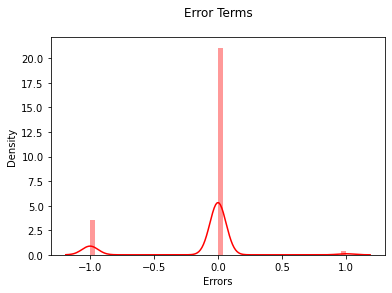

In [95]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred,color='red')
    plt.title('Error Terms\n')
    plt.xlabel('Errors')
    
plot_res_dist(y_test,y_pred)

we can see that the mean lies at 0 so we have good model in hand

**Conclusion :**

We have got a pretty much good model also we have got the accuracy of around 95.6 percent on validation data set

The important features are :

In [99]:
print(x_train.columns,end="")

Index(['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'av_rech_amt_data_8',
       'std_og_mou_8'],
      dtype='object')